# <center> Майнор "Интеллектуальный анализ данных" </center>

# <center> Курс "Современные методы машинного обучения" </center>

# <center> Лабораторная работа №1. Image Classification. </center>

   ## ЮЖАКОВ МАКСИМ ИАД2

В данной лабораторной работе вам предлагается обучить модель на основе нейронной сети для распознавания рукописных букв английского алфавита.

## Данные

Данные представлены двумя датасетами: обучающим (`train`) и тестовым (`test`). Изображения для каждого датасета находятся в `images.zip`.  
  
Обучающая выборка состоит из 65000 изображений - по 2500 изображений для каждой буквы.  
Тестовая выборка состоит из 13000 изображений - по 500 изображений для каждой буквы.  
  
Все изображения - монохромные (но в формате RGB), размерности $28 \times 28$ пикселей, в формате JPEG. 
В названии каждого файла содержатся буква, которая представлена на изображении, и уникальный номер изображения: `a_00002.jpg`.  
  
**NB:** Все изображения представлены в перевернутом виде, для корректного отображения их нужно сначала транспонировать. 

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
pic = plt.imread('train/a/a_00002.jpg')
print(pic.shape)

(28, 28, 3)


In [3]:
pic = np.transpose(pic, axes=(1, 0, 2))

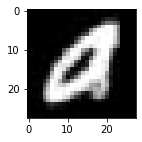

In [4]:
plt.figure(figsize=(2,2))
plt.imshow(pic)
plt.show()

## Основные задания

Ваша задача - создать и обучить модель на основе нейронной сети, которая будет предсказывать букву на картинке.  
Обучение необходимо проводить на данных из `train`, качество модели проверять на данных из `test`.  
Целевая метрика - accuracy.  
Для моделирования необходимо использовать `pytorch`.

### Задание 1  
  
*Вес в общей оценке - 0.35*  
  
1. Постройте и обучите модели с 2-мя и 3-мя полносвязными (dense) скрытыми слоями.  
При моделировании необходимо попробовать разные параметры нейронной сети - число нейронов на каждом слое, learning rate, batch size, функции активации, регуляризации и т.д. Оцените качество моделей с различными параметрами, проведите сравнительный анализ. 
2. Для наилучшей модели постройте confusion matrix результатов предсказаний модели на тестовых данных.  
Насколько равномерно обучилась ваша модель? Приведите буквы с самой лучшей и с самой худшей точностью детекции.
3. Найдите 10 пар букв, которые чаще всего путаются между собой, дайте возможное объяснение. Приведите примеры с картинками, которые были детектированы с ошибкой.
4. Возьмите первую букву вашей фамилии и укажите её точность детекции. С какими буквами ваша модель чаще всего путает эту букву?     

Сначала сделаем предобработку

In [5]:
import torch
import torchvision
import torchvision.transforms as transforms

import matplotlib.pyplot as plt
import numpy as np
import PIL

Пропишем тут транспонирование для нормального дальнейшего отображения картинок

In [6]:
transform = transforms.Compose(
    [transforms.Lambda(lambda x:np.transpose(x,axes = (1,0,2))),
     transforms.ToTensor(),
     transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

In [7]:
letter_data = torchvision.datasets.ImageFolder(root = 'train', transform = transform)

In [8]:
letter_data_t = torchvision.datasets.ImageFolder(root = 'test', transform = transform)

In [9]:
from torch.utils.data.sampler import SubsetRandomSampler
#BATCH SIZE
train_letter_loader = torch.utils.data.DataLoader(letter_data, batch_size=4,shuffle =True)
test_letter_loader = torch.utils.data.DataLoader(letter_data_t, batch_size=4,shuffle =True)

In [10]:
d = iter(train_letter_loader)

In [16]:
sample = next(d)

In [12]:
type(sample), len(sample)

(list, 2)

In [13]:
sample[0].shape, sample[1].shape

(torch.Size([4, 3, 28, 28]), torch.Size([4]))

In [14]:
sample[0][0, :, :,:]

tensor([[[-0.9843, -1.0000, -1.0000,  ..., -1.0000, -1.0000, -1.0000],
         [-0.9529, -0.9843, -1.0000,  ..., -1.0000, -1.0000, -1.0000],
         [-0.9686, -0.9608, -1.0000,  ..., -1.0000, -1.0000, -1.0000],
         ...,
         [-0.9922, -1.0000, -1.0000,  ..., -0.9608, -0.9843, -1.0000],
         [-1.0000, -0.8902, -1.0000,  ..., -0.9922, -0.9922, -1.0000],
         [-0.9529, -0.9294, -1.0000,  ..., -1.0000, -1.0000, -0.9922]],

        [[-0.9843, -1.0000, -1.0000,  ..., -1.0000, -1.0000, -1.0000],
         [-0.9529, -0.9843, -1.0000,  ..., -1.0000, -1.0000, -1.0000],
         [-0.9686, -0.9608, -1.0000,  ..., -1.0000, -1.0000, -1.0000],
         ...,
         [-0.9922, -1.0000, -1.0000,  ..., -0.9608, -0.9843, -1.0000],
         [-1.0000, -0.8902, -1.0000,  ..., -0.9922, -0.9922, -1.0000],
         [-0.9529, -0.9294, -1.0000,  ..., -1.0000, -1.0000, -0.9922]],

        [[-0.9843, -1.0000, -1.0000,  ..., -1.0000, -1.0000, -1.0000],
         [-0.9529, -0.9843, -1.0000,  ..., -1

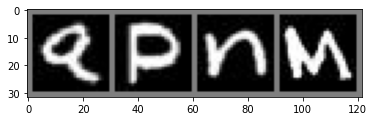

In [15]:
import matplotlib.pyplot as plt
import numpy as np

def imshow(img):
    img = img / 2 + 0.5     # unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()


# get some random training images
dataiter = iter(train_letter_loader)
images, labels = dataiter.next()

# show images
imshow(torchvision.utils.make_grid(images))

Видим, что картинки стали отображаться более или менее под нормальным углом

1) Постройте и обучите модели с 2-мя и 3-мя полносвязными (dense) скрытыми слоями.
При моделировании необходимо попробовать разные параметры нейронной сети - число нейронов на каждом слое, learning rate, batch size, функции активации, регуляризации и т.д. Оцените качество моделей с различными параметрами, проведите сравнительный анализ.

Попробуем модель с 2 полносвязными слоями

In [16]:
import torch.nn as nn
import torch.nn.functional as F


class Net_2_4(nn.Module):
    def __init__(self):
        super(Net_2_4, self).__init__()# 28*28
        self.fc1 = nn.Linear(28 * 28 * 3, 56)
        self.fc2 = nn.Linear(56, 26)

    def forward(self, x):
        x = x.view(-1, 28 * 28 * 3)
        x = F.relu(self.fc1(x))
        x = self.fc2(x)
        return x


net_2_4 = Net_2_4()

In [17]:
for parameter in net_2_4.parameters():
    print(parameter.data.shape)

torch.Size([56, 2352])
torch.Size([56])
torch.Size([26, 56])
torch.Size([26])


Для классификации будем использовать критерий кросс энтропии и оптимайзер SGD, в дальнейшем сравним его с AdamW

In [1]:
import torch.optim as optim
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model, lr=0.0001, momentum=0.9)

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.



Traceback (most recent call last):
  File "D:\anaconda\lib\site-packages\IPython\core\interactiveshell.py", line 3418, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-1-36b4718d6e79>", line 2, in <module>
    criterion = nn.CrossEntropyLoss()
NameError: name 'nn' is not defined

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "D:\anaconda\lib\site-packages\IPython\core\interactiveshell.py", line 2045, in showtraceback
    stb = value._render_traceback_()
AttributeError: 'NameError' object has no attribute '_render_traceback_'

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "D:\anaconda\lib\site-packages\IPython\core\ultratb.py", line 1170, in get_records
    return _fixed_getinnerframes(etb, number_of_lines_of_context, tb_offset)
  File "D:\anaconda\lib\site-packages\IPython\core\ultratb.py", line 316, in wrapped
    ret

TypeError: object of type 'NoneType' has no len()

In [19]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

In [20]:
device

device(type='cpu')

Пропишем классы, на которые будем делить датасет(26 английскийх букв -  26 классов)

In [21]:
classes = ('a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j', 'k', 'l', 'm', 'n', 'o', 'p', 'q', 'r', 's', 't', 'u', 'v', 'w', 'x', 'y', 'z')

Попробуем модель с разным количеством батчей в лоадере, начнем с 4

4 батча

In [22]:
from tqdm.auto import tqdm, trange
from IPython.display import clear_output

Для обучения будем использовать 5 эпох, в ходе которых у нас будут выводиться loss и accuracy для трейна и теста

In [81]:
for epoch in range(5):
    train_loss = []
    train_accuracy = []
    for x_train, y_train in tqdm(train_letter_loader, desc=f"training, epoch {epoch+1}",leave = False):    
        y_pred = net_2_4(x_train)                        
        loss = criterion(y_pred, y_train)        
        loss.backward()                                
        optimizer.step()                               
        optimizer.zero_grad()
        train_loss.append(loss.item())
        train_accuracy.extend((torch.argmax(y_pred, dim=-1) == y_train).numpy().tolist())
    print(f"Epoch: {epoch+1}, train loss: {np.mean(train_loss)}, train acc: {np.mean(train_accuracy)}")
    val_loss = []                                  
    val_accuracy = []
    with torch.no_grad():                         
        for x_val, y_val in tqdm(test_letter_loader, desc=f"validating, epoch {epoch+1}",leave = False):  
            y_pred = net_2_4(x_val)                  
            loss = criterion(y_pred, y_val)  
            val_loss.append(loss.numpy())          
            val_accuracy.extend((torch.argmax(y_pred, dim=-1) == y_val).numpy().tolist())
        
        # печатаем метрики
    print(f"Epoch: {epoch+1}, val loss: {np.mean(val_loss)}, val accuracy: {np.mean(val_accuracy)}")

Epoch: 1, train loss: 1.4013513564196918, train acc: 0.6064461538461539


Epoch: 1, val loss: 1.071060061454773, val accuracy: 0.6858461538461539


Epoch: 2, train loss: 0.9751422676452077, train acc: 0.7136769230769231


Epoch: 2, val loss: 0.9093496203422546, val accuracy: 0.7355384615384616


Epoch: 3, train loss: 0.8342301606566287, train acc: 0.7565076923076923


Epoch: 3, val loss: 0.7941892743110657, val accuracy: 0.7659230769230769


Epoch: 4, train loss: 0.7388811447316638, train acc: 0.7840461538461538


Epoch: 4, val loss: 0.7296168804168701, val accuracy: 0.7893076923076923


Epoch: 5, train loss: 0.6734736777572677, train acc: 0.8024923076923077


Epoch: 5, val loss: 0.6717544198036194, val accuracy: 0.8033076923076923


Видим,что модель уже дает accuracy 0.8, что является неплохим результатом

In [82]:
PATH = './24fc_net.pth'
torch.save(net_2_4.state_dict(), PATH)

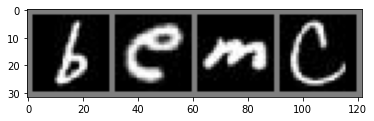

GroundTruth:      b     e     m     c


In [83]:
dataiter = iter(test_letter_loader)
images, labels = dataiter.next()

# print images
imshow(torchvision.utils.make_grid(images))
print('GroundTruth: ', ' '.join('%5s' % classes[labels[j]] for j in range(4)))

In [84]:
net_2_4 = Net_2_4()
net_2_4.load_state_dict(torch.load(PATH))

<All keys matched successfully>

In [85]:
outputs = net_2_4(images)

In [86]:
_, predicted = torch.max(outputs, 1)

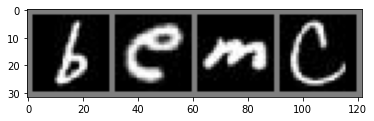

Predicted:      b     e     m     c


In [87]:
imshow(torchvision.utils.make_grid(images))
print('Predicted: ', ' '.join('%5s' % classes[predicted[j]]
                              for j in range(4)))

При сравнении предсказанных значений с действительными видим, что все предсказано верно, но точность все равно не 100%

2 батча

In [88]:
train_letter_loader = torch.utils.data.DataLoader(letter_data, batch_size=2, shuffle = True)
test_letter_loader = torch.utils.data.DataLoader(letter_data_t, batch_size=2, shuffle = True)

In [89]:
import torch.nn as nn
import torch.nn.functional as F


class Net_2_2(nn.Module):
    def __init__(self):
        super(Net_2_2, self).__init__()# 28*28
        self.fc1 = nn.Linear(28 * 28 * 3, 56)
        self.fc2 = nn.Linear(56, 26)

    def forward(self, x):
        x = x.view(-1, 28 * 28 * 3)
        x = F.relu(self.fc1(x))
        x = self.fc2(x)
        return x


net_2_2 = Net_2_2()

In [90]:
import torch.optim as optim
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net_2_2.parameters(), lr=0.0001, momentum=0.9)

In [91]:
for epoch in range(5):
    train_loss = []
    train_accuracy = []
    for x_train, y_train in tqdm(train_letter_loader, desc=f"training, epoch {epoch+1}",leave = False):    
        y_pred = net_2_2(x_train)                        
        loss = criterion(y_pred, y_train)        
        loss.backward()                                
        optimizer.step()                               
        optimizer.zero_grad()
        train_loss.append(loss.item())
        train_accuracy.extend((torch.argmax(y_pred, dim=-1) == y_train).numpy().tolist())
    print(f"Epoch: {epoch+1}, train loss: {np.mean(train_loss)}, train acc: {np.mean(train_accuracy)}")
    val_loss = []                                  
    val_accuracy = []
    with torch.no_grad():                         
        for x_val, y_val in tqdm(test_letter_loader, desc=f"validating, epoch {epoch+1}",leave = False):  
            y_pred = net_2_2(x_val)                  
            loss = criterion(y_pred, y_val)  
            val_loss.append(loss.numpy())          
            val_accuracy.extend((torch.argmax(y_pred, dim=-1) == y_val).numpy().tolist())
        
        # печатаем метрики
    print(f"Epoch: {epoch+1}, val loss: {np.mean(val_loss)}, val accuracy: {np.mean(val_accuracy)}")

Epoch: 1, train loss: 1.2424725141547548, train acc: 0.6418615384615385


Epoch: 1, val loss: 0.9358236193656921, val accuracy: 0.7278461538461538


Epoch: 2, train loss: 0.8096006854255361, train acc: 0.7610461538461538


Epoch: 2, val loss: 0.7490060329437256, val accuracy: 0.7747692307692308


Epoch: 3, train loss: 0.6676908311304413, train acc: 0.8024461538461538


Epoch: 3, val loss: 0.6591187119483948, val accuracy: 0.7991538461538461


Epoch: 4, train loss: 0.5921018536378942, train acc: 0.8225230769230769


Epoch: 4, val loss: 0.6185925602912903, val accuracy: 0.8125384615384615


Epoch: 5, train loss: 0.5433717671962254, train acc: 0.8346615384615385


Epoch: 5, val loss: 0.5608121156692505, val accuracy: 0.8328461538461538


С 2 батчами результат обучения получше

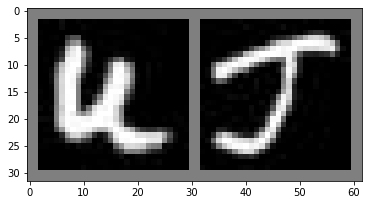

GroundTruth:      u     j


In [92]:
PATH = './22fc_net.pth'
torch.save(net_2_2.state_dict(), PATH)
dataiter = iter(test_letter_loader)
images, labels = dataiter.next()

# print images
imshow(torchvision.utils.make_grid(images))
print('GroundTruth: ', ' '.join('%5s' % classes[labels[j]] for j in range(2)))

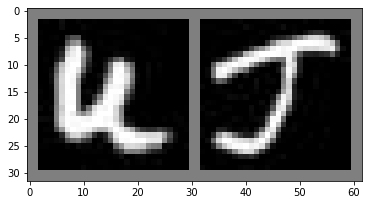

Predicted:      u     j


In [93]:
net_2_2 = Net_2_2()
net_2_2.load_state_dict(torch.load(PATH))
outputs = net_2_2(images)
_, predicted = torch.max(outputs, 1)
imshow(torchvision.utils.make_grid(images))
print('Predicted: ', ' '.join('%5s' % classes[predicted[j]]
                              for j in range(2)))

8 батчей

In [94]:
train_letter_loader = torch.utils.data.DataLoader(letter_data, batch_size=8, shuffle = True)
test_letter_loader = torch.utils.data.DataLoader(letter_data_t, batch_size=8, shuffle = True)

In [95]:
import torch.nn as nn
import torch.nn.functional as F


class Net_2_8(nn.Module):
    def __init__(self):
        super(Net_2_8, self).__init__()# 28*28
        self.fc1 = nn.Linear(28 * 28 * 3, 56)
        self.fc2 = nn.Linear(56, 26)

    def forward(self, x):
        x = x.view(-1, 28 * 28 * 3)
        x = F.relu(self.fc1(x))
        x = self.fc2(x)
        return x


net_2_8 = Net_2_8()

In [96]:
import torch.optim as optim
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net_2_8.parameters(), lr=0.0001, momentum=0.9)

In [97]:
for epoch in range(5):
    train_loss = []
    train_accuracy = []
    for x_train, y_train in tqdm(train_letter_loader, desc=f"training, epoch {epoch+1}",leave = False):    
        y_pred = net_2_8(x_train)                        
        loss = criterion(y_pred, y_train)        
        loss.backward()                                
        optimizer.step()                               
        optimizer.zero_grad()
        train_loss.append(loss.item())
        train_accuracy.extend((torch.argmax(y_pred, dim=-1) == y_train).numpy().tolist())
    print(f"Epoch: {epoch+1}, train loss: {np.mean(train_loss)}, train acc: {np.mean(train_accuracy)}")
    val_loss = []                                  
    val_accuracy = []
    with torch.no_grad():                         
        for x_val, y_val in tqdm(test_letter_loader, desc=f"validating, epoch {epoch+1}",leave = False):  
            y_pred = net_2_8(x_val)                  
            loss = criterion(y_pred, y_val)  
            val_loss.append(loss.numpy())          
            val_accuracy.extend((torch.argmax(y_pred, dim=-1) == y_val).numpy().tolist())
        
        # печатаем метрики
    print(f"Epoch: {epoch+1}, val loss: {np.mean(val_loss)}, val accuracy: {np.mean(val_accuracy)}")

Epoch: 1, train loss: 1.6862201040634741, train acc: 0.547923076923077


Epoch: 1, val loss: 1.2112369537353516, val accuracy: 0.6506153846153846


Epoch: 2, train loss: 1.1277281360415312, train acc: 0.6717384615384615


Epoch: 2, val loss: 1.0836623907089233, val accuracy: 0.6770769230769231


Epoch: 3, train loss: 1.027102569086735, train acc: 0.7011384615384615


Epoch: 3, val loss: 1.004098653793335, val accuracy: 0.7093846153846154


Epoch: 4, train loss: 0.9507231021550986, train acc: 0.7243076923076923


Epoch: 4, val loss: 0.9478946924209595, val accuracy: 0.7235384615384616


Epoch: 5, train loss: 0.8838680872412829, train acc: 0.7438461538461538


Epoch: 5, val loss: 0.8836373090744019, val accuracy: 0.7425384615384616


С 8 батчами результат оказался самым плохим, возможно, большее число эпох решило бы эту проблему

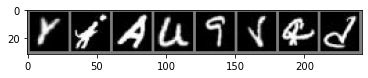

GroundTruth:      y     j     a     u     g     v     a     d


In [98]:
PATH = './28fc_net.pth'
torch.save(net_2_8.state_dict(), PATH)
dataiter = iter(test_letter_loader)
images, labels = dataiter.next()

# print images
imshow(torchvision.utils.make_grid(images))
print('GroundTruth: ', ' '.join('%5s' % classes[labels[j]] for j in range(8)))

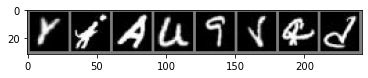

Predicted:      r     k     x     u     g     i     o     d


In [99]:
net_2_8 = Net_2_8()
net_2_8.load_state_dict(torch.load(PATH))
outputs = net_2_8(images)
_, predicted = torch.max(outputs, 1)
imshow(torchvision.utils.make_grid(images))
print('Predicted: ', ' '.join('%5s' % classes[predicted[j]]
                              for j in range(8)))

Видим, что многи значения классов были предсказаны неверно

Попробовав различные функции активации, помимо relu, лучшим оказался softplus, вот результаты

softplus

In [100]:
train_letter_loader = torch.utils.data.DataLoader(letter_data, batch_size=4, shuffle = True)
test_letter_loader = torch.utils.data.DataLoader(letter_data_t, batch_size=4, shuffle = True)

In [101]:
import torch.nn as nn
import torch.nn.functional as F


class Net_2(nn.Module):
    def __init__(self):
        super(Net_2, self).__init__()# 28*28
        self.fc1 = nn.Linear(28 * 28 * 3, 56)
        self.fc2 = nn.Linear(56, 26)

    def forward(self, x):
        x = x.view(-1, 28 * 28 * 3)
        x = F.softplus(self.fc1(x))
        x = self.fc2(x)
        return x


net_2 = Net_2()

In [102]:
import torch.optim as optim
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net_2.parameters(), lr=0.0001, momentum=0.9)

In [103]:
for epoch in range(5):
    train_loss = []
    train_accuracy = []
    for x_train, y_train in tqdm(train_letter_loader, desc=f"training, epoch {epoch+1}",leave = False):    
        y_pred = net_2(x_train)                        
        loss = criterion(y_pred, y_train)        
        loss.backward()                                
        optimizer.step()                               
        optimizer.zero_grad()
        train_loss.append(loss.item())
        train_accuracy.extend((torch.argmax(y_pred, dim=-1) == y_train).numpy().tolist())
    print(f"Epoch: {epoch+1}, train loss: {np.mean(train_loss)}, train acc: {np.mean(train_accuracy)}")
    val_loss = []                                  
    val_accuracy = []
    with torch.no_grad():                         
        for x_val, y_val in tqdm(test_letter_loader, desc=f"validating, epoch {epoch+1}",leave = False):  
            y_pred = net_2(x_val)                  
            loss = criterion(y_pred, y_val)  
            val_loss.append(loss.numpy())          
            val_accuracy.extend((torch.argmax(y_pred, dim=-1) == y_val).numpy().tolist())
        
        # печатаем метрики
    print(f"Epoch: {epoch+1}, val loss: {np.mean(val_loss)}, val accuracy: {np.mean(val_accuracy)}")

Epoch: 1, train loss: 1.469468476727605, train acc: 0.5812923076923077


Epoch: 1, val loss: 1.1256779432296753, val accuracy: 0.670923076923077


Epoch: 2, train loss: 1.0487194388319667, train acc: 0.6938923076923077


Epoch: 2, val loss: 0.9952652454376221, val accuracy: 0.7075384615384616


Epoch: 3, train loss: 0.9123217190085695, train acc: 0.7339076923076923


Epoch: 3, val loss: 0.8735829591751099, val accuracy: 0.7434615384615385


Epoch: 4, train loss: 0.7928265315368198, train acc: 0.7692769230769231


Epoch: 4, val loss: 0.7673158049583435, val accuracy: 0.7759230769230769


Epoch: 5, train loss: 0.7080387166335033, train acc: 0.7935846153846153


Epoch: 5, val loss: 0.715680718421936, val accuracy: 0.7918461538461539


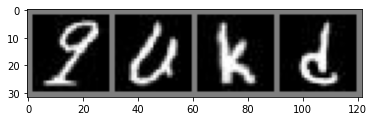

GroundTruth:      q     u     k     d


In [104]:
PATH = './2fc_net.pth'
torch.save(net_2.state_dict(), PATH)
dataiter = iter(test_letter_loader)
images, labels = dataiter.next()

# print images
imshow(torchvision.utils.make_grid(images))
print('GroundTruth: ', ' '.join('%5s' % classes[labels[j]] for j in range(4)))

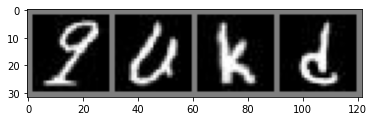

Predicted:      y     d     k     d


In [105]:
net_2 = Net_2()
net_2.load_state_dict(torch.load(PATH))
outputs = net_2(images)
_, predicted = torch.max(outputs, 1)
imshow(torchvision.utils.make_grid(images))
print('Predicted: ', ' '.join('%5s' % classes[predicted[j]]
                              for j in range(4)))

Но тут 2 из 4 предсказаны неверно

dropout

In [106]:
import torch.nn as nn
import torch.nn.functional as F


class Net_2(nn.Module):
    def __init__(self):
        super(Net_2, self).__init__()# 28*28
        self.dropout = nn.Dropout(0.1)
        self.fc1 = nn.Linear(28 * 28 * 3, 56)
        self.dropout1 = nn.Dropout(0.2)
        self.fc2 = nn.Linear(56, 26)

    def forward(self, x):
        x = x.view(-1, 28 * 28 * 3)
        x = F.relu(self.fc1(x))
        x = self.dropout1(x)
        x = self.fc2(x)
        return x


net_2 = Net_2()

In [107]:
import torch.optim as optim
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net_2.parameters(), lr=0.0001, momentum=0.9)

In [108]:
for epoch in range(5):
    train_loss = []
    train_accuracy = []
    for x_train, y_train in tqdm(train_letter_loader, desc=f"training, epoch {epoch+1}",leave = False):    
        y_pred = net_2(x_train)                        
        loss = criterion(y_pred, y_train)        
        loss.backward()                                
        optimizer.step()                               
        optimizer.zero_grad()
        train_loss.append(loss.item())
        train_accuracy.extend((torch.argmax(y_pred, dim=-1) == y_train).numpy().tolist())
    print(f"Epoch: {epoch+1}, train loss: {np.mean(train_loss)}, train acc: {np.mean(train_accuracy)}")
    val_loss = []                                  
    val_accuracy = []
    with torch.no_grad():                         
        for x_val, y_val in tqdm(test_letter_loader, desc=f"validating, epoch {epoch+1}",leave = False):  
            y_pred = net_2(x_val)                  
            loss = criterion(y_pred, y_val)  
            val_loss.append(loss.numpy())          
            val_accuracy.extend((torch.argmax(y_pred, dim=-1) == y_val).numpy().tolist())
        
        # печатаем метрики
    print(f"Epoch: {epoch+1}, val loss: {np.mean(val_loss)}, val accuracy: {np.mean(val_accuracy)}")

Epoch: 1, train loss: 1.6177488151953772, train acc: 0.5327076923076923


Epoch: 1, val loss: 1.249794602394104, val accuracy: 0.6268461538461538


Epoch: 2, train loss: 1.1367156515027468, train acc: 0.6626307692307692


Epoch: 2, val loss: 1.0693777799606323, val accuracy: 0.6851538461538461


Epoch: 3, train loss: 0.996964486263062, train acc: 0.7048


Epoch: 3, val loss: 0.9608287215232849, val accuracy: 0.7156153846153847


Epoch: 4, train loss: 0.9164891231080088, train acc: 0.7268769230769231


Epoch: 4, val loss: 0.9042475819587708, val accuracy: 0.7252307692307692


Epoch: 5, train loss: 0.8631291644305564, train acc: 0.7402307692307692


Epoch: 5, val loss: 0.8643440008163452, val accuracy: 0.7357692307692307


С dropout результат оказался не лучшим

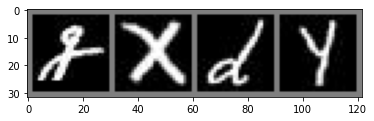

GroundTruth:      g     x     d     y


In [109]:
PATH = './2fc_net.pth'
torch.save(net_2.state_dict(), PATH)
dataiter = iter(test_letter_loader)
images, labels = dataiter.next()

# print images
imshow(torchvision.utils.make_grid(images))
print('GroundTruth: ', ' '.join('%5s' % classes[labels[j]] for j in range(4)))

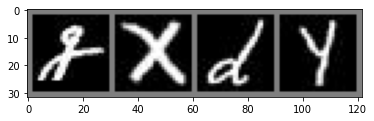

Predicted:      t     x     d     y


In [110]:
net_2 = Net_2()
net_2.load_state_dict(torch.load(PATH))
outputs = net_2(images)
_, predicted = torch.max(outputs, 1)
imshow(torchvision.utils.make_grid(images))
print('Predicted: ', ' '.join('%5s' % classes[predicted[j]]
                              for j in range(4)))

Теперь поробуем сетку с 3 полносвязными слоями

In [111]:
import torch.nn as nn
import torch.nn.functional as F


class Net_3_4(nn.Module):
    def __init__(self):
        super(Net_3_4, self).__init__()# 28*28
        self.fc1 = nn.Linear(28 * 28 * 3, 128)
        self.fc2 = nn.Linear(128, 64)
        self.fc3 = nn.Linear(64,26)

    def forward(self, x):
        x = x.view(-1, 28 * 28 * 3)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x


net_3_4 = Net_3_4()

In [112]:
import torch.optim as optim
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net_3_4.parameters(), lr=0.0001, momentum=0.9)

In [113]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

In [114]:
device

device(type='cpu')

Так же проверим ее на различном количестве батчей

4 батча

In [115]:
for epoch in range(5):
    train_loss = []
    train_accuracy = []
    for x_train, y_train in tqdm(train_letter_loader, desc=f"training, epoch {epoch+1}",leave = False):    
        y_pred = net_3_4(x_train)                        
        loss = criterion(y_pred, y_train)        
        loss.backward()                                
        optimizer.step()                               
        optimizer.zero_grad()
        train_loss.append(loss.item())
        train_accuracy.extend((torch.argmax(y_pred, dim=-1) == y_train).numpy().tolist())
    print(f"Epoch: {epoch+1}, train loss: {np.mean(train_loss)}, train acc: {np.mean(train_accuracy)}")
    val_loss = []                                  
    val_accuracy = []
    with torch.no_grad():                         
        for x_val, y_val in tqdm(test_letter_loader, desc=f"validating, epoch {epoch+1}",leave = False):  
            y_pred = net_3_4(x_val)                  
            loss = criterion(y_pred, y_val)  
            val_loss.append(loss.numpy())          
            val_accuracy.extend((torch.argmax(y_pred, dim=-1) == y_val).numpy().tolist())
        
        # печатаем метрики
    print(f"Epoch: {epoch+1}, val loss: {np.mean(val_loss)}, val accuracy: {np.mean(val_accuracy)}")

Epoch: 1, train loss: 1.6765987917560798, train acc: 0.5332


Epoch: 1, val loss: 1.134469747543335, val accuracy: 0.6710769230769231


Epoch: 2, train loss: 1.0044187464310572, train acc: 0.704123076923077


Epoch: 2, val loss: 0.9011873602867126, val accuracy: 0.7359230769230769


Epoch: 3, train loss: 0.791928977275869, train acc: 0.7665384615384615


Epoch: 3, val loss: 0.7297441363334656, val accuracy: 0.783923076923077


Epoch: 4, train loss: 0.6525958879586309, train acc: 0.8070153846153846


Epoch: 4, val loss: 0.633383572101593, val accuracy: 0.8113846153846154


Epoch: 5, train loss: 0.5679671404625647, train acc: 0.8306615384615385


Epoch: 5, val loss: 0.5603985786437988, val accuracy: 0.8335384615384616


Результат стал лучше

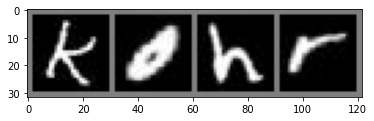

GroundTruth:      k     o     h     r


In [116]:
PATH = './3fc_net.pth'
torch.save(net_3_4.state_dict(), PATH)
dataiter = iter(test_letter_loader)
images, labels = dataiter.next()

# print images
imshow(torchvision.utils.make_grid(images))
print('GroundTruth: ', ' '.join('%5s' % classes[labels[j]] for j in range(4)))

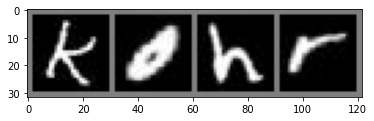

Predicted:      k     o     h     r


In [117]:
net_3_4 = Net_3_4()
net_3_4.load_state_dict(torch.load(PATH))
outputs = net_3_4(images)
_, predicted = torch.max(outputs, 1)
imshow(torchvision.utils.make_grid(images))
print('Predicted: ', ' '.join('%5s' % classes[predicted[j]]
                              for j in range(4)))

2 батча

In [118]:
train_letter_loader = torch.utils.data.DataLoader(letter_data, batch_size=2, shuffle = True)
test_letter_loader = torch.utils.data.DataLoader(letter_data_t, batch_size=2, shuffle = True)

In [119]:
import torch.nn as nn
import torch.nn.functional as F


class Net_3_2(nn.Module):
    def __init__(self):
        super(Net_3_2, self).__init__()# 28*28
        self.fc1 = nn.Linear(28 * 28 * 3, 128)
        self.fc2 = nn.Linear(128, 64)
        self.fc3 = nn.Linear(64,26)

    def forward(self, x):
        x = x.view(-1, 28 * 28 * 3)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x


net_3_2 = Net_3_2()

In [120]:
import torch.optim as optim
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net_3_2.parameters(), lr=0.0001, momentum=0.9)

In [121]:
for epoch in range(5):
    train_loss = []
    train_accuracy = []
    for x_train, y_train in tqdm(train_letter_loader, desc=f"training, epoch {epoch+1}",leave = False):    
        y_pred = net_3_2(x_train)                        
        loss = criterion(y_pred, y_train)        
        loss.backward()                                
        optimizer.step()                               
        optimizer.zero_grad()
        train_loss.append(loss.item())
        train_accuracy.extend((torch.argmax(y_pred, dim=-1) == y_train).numpy().tolist())
    print(f"Epoch: {epoch+1}, train loss: {np.mean(train_loss)}, train acc: {np.mean(train_accuracy)}")
    val_loss = []                                  
    val_accuracy = []
    with torch.no_grad():                         
        for x_val, y_val in tqdm(test_letter_loader, desc=f"validating, epoch {epoch+1}",leave = False):  
            y_pred = net_3_2(x_val)                  
            loss = criterion(y_pred, y_val)  
            val_loss.append(loss.numpy())          
            val_accuracy.extend((torch.argmax(y_pred, dim=-1) == y_val).numpy().tolist())
        
        # печатаем метрики
    print(f"Epoch: {epoch+1}, val loss: {np.mean(val_loss)}, val accuracy: {np.mean(val_accuracy)}")

Epoch: 1, train loss: 1.3620859370291234, train acc: 0.6064153846153846


Epoch: 1, val loss: 0.8984799981117249, val accuracy: 0.7343076923076923


Epoch: 2, train loss: 0.745504192949287, train acc: 0.7755076923076923


Epoch: 2, val loss: 0.6463066339492798, val accuracy: 0.801


Epoch: 3, train loss: 0.5628073084752062, train acc: 0.8255076923076923


Epoch: 3, val loss: 0.5360904932022095, val accuracy: 0.8384615384615385


Epoch: 4, train loss: 0.47340441814949735, train acc: 0.8532153846153846


Epoch: 4, val loss: 0.473408579826355, val accuracy: 0.8528461538461538


Epoch: 5, train loss: 0.4201472740621803, train acc: 0.8681538461538462


Epoch: 5, val loss: 0.4380800127983093, val accuracy: 0.861


Тут еще лучше, правда обучется он дольше, так как берет больше данных

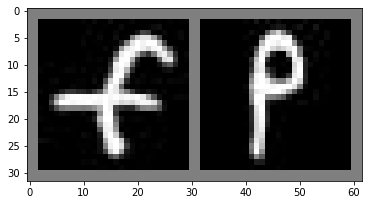

GroundTruth:      f     p


In [122]:
PATH = './32fc_net.pth'
torch.save(net_3_2.state_dict(), PATH)
dataiter = iter(test_letter_loader)
images, labels = dataiter.next()

# print images
imshow(torchvision.utils.make_grid(images))
print('GroundTruth: ', ' '.join('%5s' % classes[labels[j]] for j in range(2)))

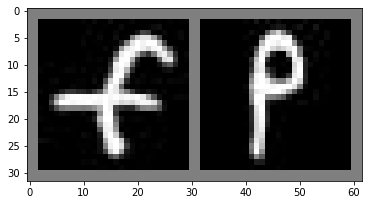

Predicted:      f     p


In [123]:
net_3_2 = Net_3_2()
net_3_2.load_state_dict(torch.load(PATH))
outputs = net_3_2(images)
_, predicted = torch.max(outputs, 1)
imshow(torchvision.utils.make_grid(images))
print('Predicted: ', ' '.join('%5s' % classes[predicted[j]]
                              for j in range(2)))

8 батчей

In [124]:
train_letter_loader = torch.utils.data.DataLoader(letter_data, batch_size=8, shuffle = True)
test_letter_loader = torch.utils.data.DataLoader(letter_data_t, batch_size=8, shuffle = True)

In [125]:
import torch.nn as nn
import torch.nn.functional as F


class Net_3_8(nn.Module):
    def __init__(self):
        super(Net_3_8, self).__init__()# 28*28
        self.fc1 = nn.Linear(28 * 28 * 3, 128)
        self.fc2 = nn.Linear(128, 64)
        self.fc3 = nn.Linear(64,26)

    def forward(self, x):
        x = x.view(-1, 28 * 28 * 3)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x


net_3_8 = Net_3_8()

In [126]:
import torch.optim as optim
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net_3_8.parameters(), lr=0.0001, momentum=0.9)

In [127]:
for epoch in range(5):
    train_loss = []
    train_accuracy = []
    for x_train, y_train in tqdm(train_letter_loader, desc=f"training, epoch {epoch+1}",leave = False):    
        y_pred = net_3_8(x_train)                        
        loss = criterion(y_pred, y_train)        
        loss.backward()                                
        optimizer.step()                               
        optimizer.zero_grad()
        train_loss.append(loss.item())
        train_accuracy.extend((torch.argmax(y_pred, dim=-1) == y_train).numpy().tolist())
    print(f"Epoch: {epoch+1}, train loss: {np.mean(train_loss)}, train acc: {np.mean(train_accuracy)}")
    val_loss = []                                  
    val_accuracy = []
    with torch.no_grad():                         
        for x_val, y_val in tqdm(test_letter_loader, desc=f"validating, epoch {epoch+1}",leave = False):  
            y_pred = net_3_8(x_val)                  
            loss = criterion(y_pred, y_val)  
            val_loss.append(loss.numpy())          
            val_accuracy.extend((torch.argmax(y_pred, dim=-1) == y_val).numpy().tolist())
        
        # печатаем метрики
    print(f"Epoch: {epoch+1}, val loss: {np.mean(val_loss)}, val accuracy: {np.mean(val_accuracy)}")

Epoch: 1, train loss: 2.1192102167386273, train acc: 0.4421230769230769


Epoch: 1, val loss: 1.3368101119995117, val accuracy: 0.6052307692307692


Epoch: 2, train loss: 1.2096940026154885, train acc: 0.6459846153846154


Epoch: 2, val loss: 1.1182700395584106, val accuracy: 0.6716923076923077


Epoch: 3, train loss: 1.0532688674009762, train acc: 0.6924923076923077


Epoch: 3, val loss: 1.0022764205932617, val accuracy: 0.7038461538461539


Epoch: 4, train loss: 0.9381910976464932, train acc: 0.7250461538461539


Epoch: 4, val loss: 0.8969538807868958, val accuracy: 0.7374615384615385


Epoch: 5, train loss: 0.8330783811825972, train acc: 0.7563076923076923


Epoch: 5, val loss: 0.7990900874137878, val accuracy: 0.7653076923076924


Тут снова самый плохой результат

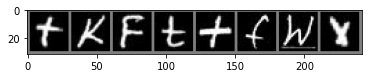

GroundTruth:      t     k     f     t     t     f     w     x


In [128]:
PATH = './38fc_net.pth'
torch.save(net_3_8.state_dict(), PATH)
dataiter = iter(test_letter_loader)
images, labels = dataiter.next()

# print images
imshow(torchvision.utils.make_grid(images))
print('GroundTruth: ', ' '.join('%5s' % classes[labels[j]] for j in range(8)))

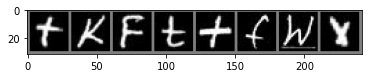

Predicted:      t     x     f     t     t     f     h     x


In [129]:
net_3_8 = Net_3_8()
net_3_8.load_state_dict(torch.load(PATH))
outputs = net_3_8(images)
_, predicted = torch.max(outputs, 1)
imshow(torchvision.utils.make_grid(images))
print('Predicted: ', ' '.join('%5s' % classes[predicted[j]]
                              for j in range(8)))

Теперь поробуем использовать другой optimizer - AdamW

ADAMW

In [130]:
train_letter_loader = torch.utils.data.DataLoader(letter_data, batch_size=4, shuffle = True)
test_letter_loader = torch.utils.data.DataLoader(letter_data_t, batch_size=4, shuffle = True)

In [131]:
import torch.nn as nn
import torch.nn.functional as F


class Net_3_a(nn.Module):
    def __init__(self):
        super(Net_3_a, self).__init__()# 28*28
        self.fc1 = nn.Linear(28 * 28 * 3, 128)
        self.fc2 = nn.Linear(128, 64)
        self.fc3 = nn.Linear(64,26)

    def forward(self, x):
        x = x.view(-1, 28 * 28 * 3)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x


net_3_a = Net_3_a()

In [132]:
import torch.optim as optim
criterion = nn.CrossEntropyLoss()
optimizer = optim.AdamW(net_3_a.parameters(), lr=0.0001)

In [133]:
for epoch in range(5):
    train_loss = []
    train_accuracy = []
    for x_train, y_train in tqdm(train_letter_loader, desc=f"training, epoch {epoch+1}",leave = False):    
        y_pred = net_3_a(x_train)                        
        loss = criterion(y_pred, y_train)        
        loss.backward()                                
        optimizer.step()                               
        optimizer.zero_grad()
        train_loss.append(loss.item())
        train_accuracy.extend((torch.argmax(y_pred, dim=-1) == y_train).numpy().tolist())
    print(f"Epoch: {epoch+1}, train loss: {np.mean(train_loss)}, train acc: {np.mean(train_accuracy)}")
    val_loss = []                                  
    val_accuracy = []
    with torch.no_grad():                         
        for x_val, y_val in tqdm(test_letter_loader, desc=f"validating, epoch {epoch+1}",leave = False):  
            y_pred = net_3_a(x_val)                  
            loss = criterion(y_pred, y_val)  
            val_loss.append(loss.numpy())          
            val_accuracy.extend((torch.argmax(y_pred, dim=-1) == y_val).numpy().tolist())
        
        # печатаем метрики
    print(f"Epoch: {epoch+1}, val loss: {np.mean(val_loss)}, val accuracy: {np.mean(val_accuracy)}")

Epoch: 1, train loss: 1.2272862705941383, train acc: 0.6427076923076923


Epoch: 1, val loss: 0.8694821000099182, val accuracy: 0.7445384615384616


Epoch: 2, train loss: 0.7367923343540385, train acc: 0.7792769230769231


Epoch: 2, val loss: 0.663977861404419, val accuracy: 0.7983076923076923


Epoch: 3, train loss: 0.5817861907254904, train acc: 0.823


Epoch: 3, val loss: 0.5664460062980652, val accuracy: 0.8271538461538461


Epoch: 4, train loss: 0.5036548900569466, train acc: 0.8448615384615384


Epoch: 4, val loss: 0.5049033761024475, val accuracy: 0.8403076923076923


Epoch: 5, train loss: 0.45142646078432624, train acc: 0.8584307692307692


Epoch: 5, val loss: 0.49204373359680176, val accuracy: 0.8491538461538461


Учитывая, что тут 4 батча, результат стал лучше, чем при использовании SGD

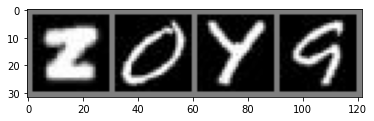

GroundTruth:      z     o     y     g


In [134]:
PATH = './3fc_net.pth'
torch.save(net_3_a.state_dict(), PATH)
dataiter = iter(test_letter_loader)
images, labels = dataiter.next()

# print images
imshow(torchvision.utils.make_grid(images))
print('GroundTruth: ', ' '.join('%5s' % classes[labels[j]] for j in range(4)))

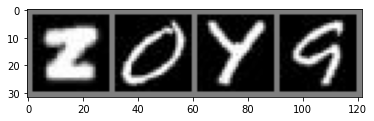

Predicted:      z     o     y     g


In [135]:
net_3_a = Net_3_a()
net_3_a.load_state_dict(torch.load(PATH))
outputs = net_3_a(images)
_, predicted = torch.max(outputs, 1)
imshow(torchvision.utils.make_grid(images))
print('Predicted: ', ' '.join('%5s' % classes[predicted[j]]
                              for j in range(4)))

Снова попробуем softplus

In [136]:
import torch.nn as nn
import torch.nn.functional as F


class Net_3(nn.Module):
    def __init__(self):
        super(Net_3, self).__init__()# 28*28
        self.fc1 = nn.Linear(28 * 28 * 3, 128)
        self.fc2 = nn.Linear(128, 64)
        self.fc3 = nn.Linear(64,26)

    def forward(self, x):
        x = x.view(-1, 28 * 28 * 3)
        x = F.softplus(self.fc1(x))
        x = F.softplus(self.fc2(x))
        x = self.fc3(x)
        return x


net_3 = Net_3()

In [137]:
import torch.optim as optim
criterion = nn.CrossEntropyLoss()
optimizer = optim.AdamW(net_3.parameters(), lr=0.0001)

In [138]:
for epoch in range(5):
    train_loss = []
    train_accuracy = []
    for x_train, y_train in tqdm(train_letter_loader, desc=f"training, epoch {epoch+1}",leave = False):    
        y_pred = net_3(x_train)                        
        loss = criterion(y_pred, y_train)        
        loss.backward()                                
        optimizer.step()                               
        optimizer.zero_grad()
        train_loss.append(loss.item())
        train_accuracy.extend((torch.argmax(y_pred, dim=-1) == y_train).numpy().tolist())
    print(f"Epoch: {epoch+1}, train loss: {np.mean(train_loss)}, train acc: {np.mean(train_accuracy)}")
    val_loss = []                                  
    val_accuracy = []
    with torch.no_grad():                         
        for x_val, y_val in tqdm(test_letter_loader, desc=f"validating, epoch {epoch+1}",leave = False):  
            y_pred = net_3(x_val)                  
            loss = criterion(y_pred, y_val)  
            val_loss.append(loss.numpy())          
            val_accuracy.extend((torch.argmax(y_pred, dim=-1) == y_val).numpy().tolist())
        
        # печатаем метрики
    print(f"Epoch: {epoch+1}, val loss: {np.mean(val_loss)}, val accuracy: {np.mean(val_accuracy)}")

Epoch: 1, train loss: 1.1340890330324953, train acc: 0.665676923076923


Epoch: 1, val loss: 0.8171371817588806, val accuracy: 0.7585384615384615


Epoch: 2, train loss: 0.6713627845464704, train acc: 0.7986461538461539


Epoch: 2, val loss: 0.591199517250061, val accuracy: 0.820923076923077


Epoch: 3, train loss: 0.5239029990965787, train acc: 0.8399384615384615


Epoch: 3, val loss: 0.5009561777114868, val accuracy: 0.8465384615384616


Epoch: 4, train loss: 0.4475099575648944, train acc: 0.8616307692307692


Epoch: 4, val loss: 0.4920792281627655, val accuracy: 0.8494615384615385


Epoch: 5, train loss: 0.3988399640824932, train acc: 0.8742769230769231


Epoch: 5, val loss: 0.41938960552215576, val accuracy: 0.8709230769230769


Тут, на удивление результат ошибки и аккураси стал лучше, чем с Relu

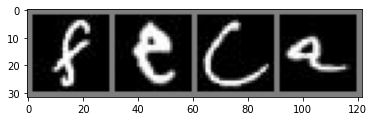

GroundTruth:      f     e     c     a


In [139]:
PATH = './3fc_net.pth'
torch.save(net_3.state_dict(), PATH)
dataiter = iter(test_letter_loader)
images, labels = dataiter.next()

# print images
imshow(torchvision.utils.make_grid(images))
print('GroundTruth: ', ' '.join('%5s' % classes[labels[j]] for j in range(4)))

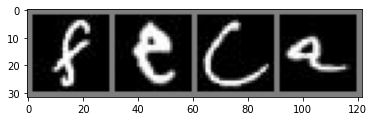

Predicted:      f     e     c     a


In [140]:
net_3 = Net_3()
net_3.load_state_dict(torch.load(PATH))
outputs = net_3(images)
_, predicted = torch.max(outputs, 1)
imshow(torchvision.utils.make_grid(images))
print('Predicted: ', ' '.join('%5s' % classes[predicted[j]]
                              for j in range(4)))

Попробуем dropout

In [141]:
import torch.nn as nn
import torch.nn.functional as F


class Net_3(nn.Module):
    def __init__(self):
        super(Net_3, self).__init__()# 28*28
        self.dropout = nn.Dropout(0.1)
        self.fc1 = nn.Linear(28 * 28 * 3, 128)
        self.dropout1 = nn.Dropout(0.2)
        self.fc2 = nn.Linear(128, 64)
        self.dropout2 = nn.Dropout(0.1)
        self.fc3 = nn.Linear(64,26)

    def forward(self, x):
        x = x.view(-1, 28 * 28 * 3)
        x = F.relu(self.fc1(x))
        x = self.dropout1(x)
        x = F.relu(self.fc2(x))
        x = self.dropout2(x)
        x = self.fc3(x)
        return x


net_3 = Net_3()

In [142]:
import torch.optim as optim
criterion = nn.CrossEntropyLoss()
optimizer = optim.AdamW(net_3.parameters(), lr=0.0001)

In [143]:
for epoch in range(5):
    train_loss = []
    train_accuracy = []
    for x_train, y_train in tqdm(train_letter_loader, desc=f"training, epoch {epoch+1}",leave = False):    
        y_pred = net_3(x_train)                        
        loss = criterion(y_pred, y_train)        
        loss.backward()                                
        optimizer.step()                               
        optimizer.zero_grad()
        train_loss.append(loss.item())
        train_accuracy.extend((torch.argmax(y_pred, dim=-1) == y_train).numpy().tolist())
    print(f"Epoch: {epoch+1}, train loss: {np.mean(train_loss)}, train acc: {np.mean(train_accuracy)}")
    val_loss = []                                  
    val_accuracy = []
    with torch.no_grad():                         
        for x_val, y_val in tqdm(test_letter_loader, desc=f"validating, epoch {epoch+1}",leave = False):  
            y_pred = net_3(x_val)                  
            loss = criterion(y_pred, y_val)  
            val_loss.append(loss.numpy())          
            val_accuracy.extend((torch.argmax(y_pred, dim=-1) == y_val).numpy().tolist())
        
        # печатаем метрики
    print(f"Epoch: {epoch+1}, val loss: {np.mean(val_loss)}, val accuracy: {np.mean(val_accuracy)}")

Epoch: 1, train loss: 1.4012201491812102, train acc: 0.5797538461538462


Epoch: 1, val loss: 1.0518970489501953, val accuracy: 0.6817692307692308


Epoch: 2, train loss: 0.9254691071987725, train acc: 0.7162923076923077


Epoch: 2, val loss: 0.8644660711288452, val accuracy: 0.7361538461538462


Epoch: 3, train loss: 0.7910864437549303, train acc: 0.7572615384615384


Epoch: 3, val loss: 0.7646780610084534, val accuracy: 0.7616923076923077


Epoch: 4, train loss: 0.7151850583454451, train acc: 0.7791384615384616


Epoch: 4, val loss: 0.7307698130607605, val accuracy: 0.7729230769230769


Epoch: 5, train loss: 0.6691116655255883, train acc: 0.7926


Epoch: 5, val loss: 0.6985165476799011, val accuracy: 0.7812307692307693


Результаты снова не самые лучшие

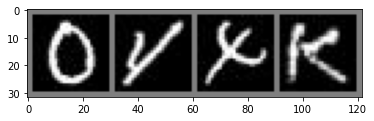

GroundTruth:      o     y     x     k


In [144]:
PATH = './3fc_net.pth'
torch.save(net_3.state_dict(), PATH)
dataiter = iter(test_letter_loader)
images, labels = dataiter.next()

# print images
imshow(torchvision.utils.make_grid(images))
print('GroundTruth: ', ' '.join('%5s' % classes[labels[j]] for j in range(4)))

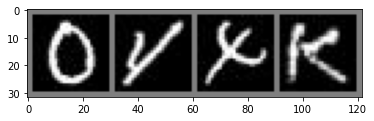

Predicted:      o     v     x     k


In [145]:
net_3 = Net_3()
net_3.load_state_dict(torch.load(PATH))
outputs = net_3(images)
_, predicted = torch.max(outputs, 1)
imshow(torchvision.utils.make_grid(images))
print('Predicted: ', ' '.join('%5s' % classes[predicted[j]]
                              for j in range(4)))

Посмотрим, на лучшую модель, совместив 2 батча, softplus и AdamW, так же лучше значения парамтеров и слоев модели, которые удалось получить

In [149]:
train_letter_loader = torch.utils.data.DataLoader(letter_data, batch_size=2, shuffle = True)
test_letter_loader = torch.utils.data.DataLoader(letter_data_t, batch_size=2, shuffle = True)

In [268]:
import torch.nn as nn
import torch.nn.functional as F


class Net_3_b(nn.Module):
    def __init__(self):
        super(Net_3_b, self).__init__()# 28*28
        self.fc1 = nn.Linear(28 * 28 * 3, 128)
        self.fc2 = nn.Linear(128, 64)
        self.fc3 = nn.Linear(64,26)

    def forward(self, x):
        x = x.view(-1, 28 * 28 * 3)
        x = F.softplus(self.fc1(x))
        x = F.softplus(self.fc2(x))
        x = self.fc3(x)
        return x


net_3_b = Net_3_b()

In [269]:
import torch.optim as optim
criterion = nn.CrossEntropyLoss()
optimizer = optim.AdamW(net_3_b.parameters(), lr=0.0001)

In [270]:
for epoch in range(5):
    train_loss = []
    train_accuracy = []
    for x_train, y_train in tqdm(train_letter_loader, desc=f"training, epoch {epoch+1}",leave = False):    
        y_pred = net_3_b(x_train)                        
        loss = criterion(y_pred, y_train)        
        loss.backward()                                
        optimizer.step()                               
        optimizer.zero_grad()
        train_loss.append(loss.item())
        train_accuracy.extend((torch.argmax(y_pred, dim=-1) == y_train).numpy().tolist())
    print(f"Epoch: {epoch+1}, train loss: {np.mean(train_loss)}, train acc: {np.mean(train_accuracy)}")
    val_loss = []                                  
    val_accuracy = []
    with torch.no_grad():                         
        for x_val, y_val in tqdm(test_letter_loader, desc=f"validating, epoch {epoch+1}",leave = False):  
            y_pred = net_3_b(x_val)                  
            loss = criterion(y_pred, y_val)  
            val_loss.append(loss.numpy())          
            val_accuracy.extend((torch.argmax(y_pred, dim=-1) == y_val).numpy().tolist())
        
        # печатаем метрики
    print(f"Epoch: {epoch+1}, val loss: {np.mean(val_loss)}, val accuracy: {np.mean(val_accuracy)}")

Epoch: 1, train loss: 1.1576927958857555, train acc: 0.6598923076923077


Epoch: 1, val loss: 0.832176685333252, val accuracy: 0.7458461538461538


Epoch: 2, train loss: 0.6841805120564998, train acc: 0.7951538461538461


Epoch: 2, val loss: 0.6070410013198853, val accuracy: 0.8183076923076923


Epoch: 3, train loss: 0.5231717276348159, train acc: 0.8406461538461538


Epoch: 3, val loss: 0.5086300373077393, val accuracy: 0.846


Epoch: 4, train loss: 0.4464415800483826, train acc: 0.8613846153846154


Epoch: 4, val loss: 0.462055504322052, val accuracy: 0.8576153846153847


Epoch: 5, train loss: 0.39780872878999307, train acc: 0.8760153846153846


Epoch: 5, val loss: 0.4320196211338043, val accuracy: 0.8637692307692307


Результаты вполне неплохие, больше 85% accuracy

In [280]:
correct = 0
total = 0
with torch.no_grad():
    for data in test_letter_loader:
        images, labels = data
        outputs = net_3_b(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print('Accuracy of the network on the test images: %d %%' % (
    100 * correct / total))

Accuracy of the network on the test images: 86 %


Теперь построим матрицу предсказаний модели

In [274]:
pred = np.array([])
lab = np.array([])
out = np.empty(26)
imgs = []
with torch.no_grad():
    for data in test_letter_loader:
        images, labels = data
        outputs = net_3_b(images)
        _, predicted = torch.max(outputs.data, 1)
        pred = np.append(pred,predicted.data)
        lab = np.append(lab,labels.data)
        for output in outputs:
            out = np.vstack([out,output.numpy()])
        imgs.extend(images.numpy())

pred = torch.tensor(pred).to(torch.int32)
lab = torch.tensor(lab).to(torch.int32)
out = torch.tensor(out)

In [275]:
from torchmetrics import ConfusionMatrix
import seaborn as sns
cm = ConfusionMatrix(num_classes=26)
confmat = cm(pred,lab)

<AxesSubplot:>

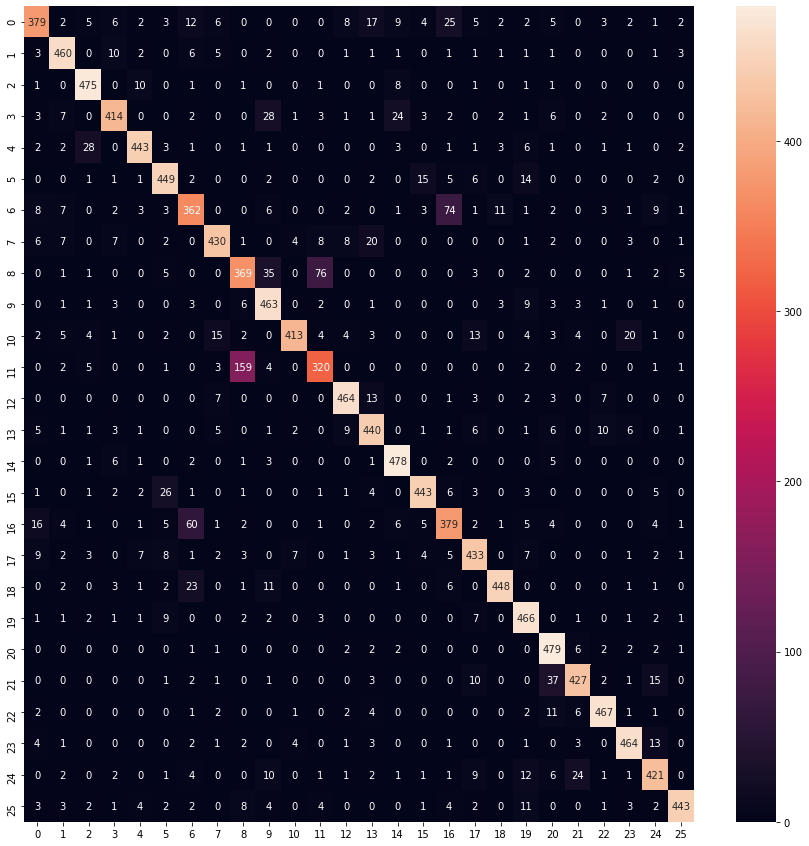

In [276]:
plt.figure(figsize = (15,15))
sns.heatmap(confmat.to(torch.int32), annot=True, fmt ='d')

Для наилучшей модели постройте confusion matrix результатов предсказаний модели на тестовых данных.
Насколько равномерно обучилась ваша модель? Приведите буквы с самой лучшей и с самой худшей точностью детекции.

Модель обучилась относительно равномерно, к каждой букве отходило около 400 правильных предсказаний. Ниже можно увидеть процентное соотношение правильности детекции букв. Самая лучшая по предсказаниям буква - буквы "O" и "U" - по 96% точных предсказаний пришлось на их счет. Что касается самой худшей буквы: "l" - 64% точных предсказаний. Вероятно, модель путает ее с буквой "i" или "j", т.к внешне они похожи

In [277]:
class_correct = list(0. for i in range(26))
class_total = list(0. for i in range(26))
with torch.no_grad():
    for data in test_letter_loader:
        images, labels = data
        outputs = net_3_b(images)
        _, predicted = torch.max(outputs, 1)
        c = (predicted == labels).squeeze()
        for i in range(2):
            label = labels[i]
            class_correct[label] += c[i].item()
            class_total[label] += 1


for i in range(26):
    print('Accuracy of %5s : %2d %%' % (
        classes[i], 100 * class_correct[i] / class_total[i]))

Accuracy of     a : 74 %
Accuracy of     b : 91 %
Accuracy of     c : 95 %
Accuracy of     d : 83 %
Accuracy of     e : 88 %
Accuracy of     f : 91 %
Accuracy of     g : 74 %
Accuracy of     h : 86 %
Accuracy of     i : 72 %
Accuracy of     j : 92 %
Accuracy of     k : 82 %
Accuracy of     l : 64 %
Accuracy of     m : 92 %
Accuracy of     n : 86 %
Accuracy of     o : 96 %
Accuracy of     p : 90 %
Accuracy of     q : 76 %
Accuracy of     r : 87 %
Accuracy of     s : 90 %
Accuracy of     t : 91 %
Accuracy of     u : 96 %
Accuracy of     v : 83 %
Accuracy of     w : 94 %
Accuracy of     x : 93 %
Accuracy of     y : 83 %
Accuracy of     z : 90 %


Найдите 10 пар букв, которые чаще всего путаются между собой, дайте возможное объяснение. Приведите примеры с картинками, которые были детектированы с ошибкой.

Проанализировав матрицу,можно заметить, что чаще всего путаются 11 и 8 буква - 156+79 ошибок

буквы l и i, как мы и догадались раньше - у них самая низкая точность детекции.

Ниже перечень пар путающихся букв

In [334]:
classes[11],classes[8]

('l', 'i')

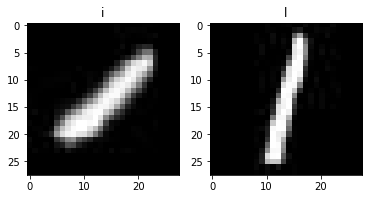

<Figure size 144x144 with 0 Axes>

In [368]:
pic1 = plt.imread('test/i/i_65048.jpg')
pic2 = plt.imread('test/l/l_65164.jpg')
pic1 = np.transpose(pic1, axes=(1, 0, 2))
pic2 = np.transpose(pic2, axes=(1, 0, 2))
fig, axes = plt.subplots(1, 2)
plt.figure(figsize=(2,2))
axes[0].imshow(pic1)
axes[0].set_title('i')
axes[1].imshow(pic2)
axes[1].set_title('l')
plt.show()

In [352]:
classes[6],classes[16]

('g', 'q')

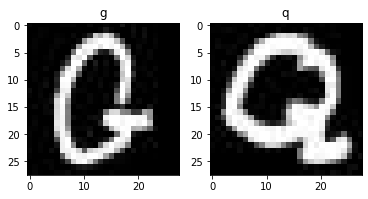

<Figure size 144x144 with 0 Axes>

In [395]:
pic1 = plt.imread('test/g/g_68184.jpg')
pic2 = plt.imread('test/q/q_66318.jpg')
pic1 = np.transpose(pic1, axes=(1, 0, 2))
pic2 = np.transpose(pic2, axes=(1, 0, 2))
fig, axes = plt.subplots(1, 2)
plt.figure(figsize=(2,2))
axes[0].imshow(pic1)
axes[0].set_title('g')
axes[1].imshow(pic2)
axes[1].set_title('q')
plt.show()

In [353]:
classes[20],classes[21]

('u', 'v')

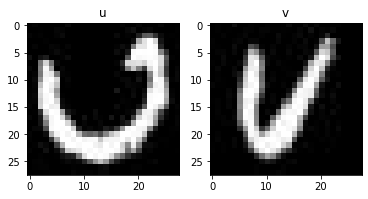

<Figure size 144x144 with 0 Axes>

In [384]:
pic1 = plt.imread('test/u/u_65046.jpg')
pic2 = plt.imread('test/v/v_75748.jpg')
pic1 = np.transpose(pic1, axes=(1, 0, 2))
pic2 = np.transpose(pic2, axes=(1, 0, 2))
fig, axes = plt.subplots(1, 2)
plt.figure(figsize=(2,2))
axes[0].imshow(pic1)
axes[0].set_title('u')
axes[1].imshow(pic2)
axes[1].set_title('v')
plt.show()

In [354]:
classes[21],classes[24]

('v', 'y')

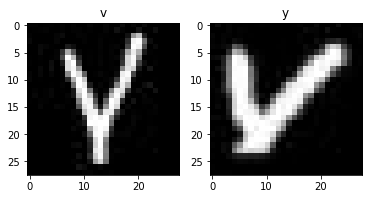

<Figure size 144x144 with 0 Axes>

In [385]:
pic1 = plt.imread('test/v/v_74909.jpg')
pic2 = plt.imread('test/y/y_73069.jpg')
pic1 = np.transpose(pic1, axes=(1, 0, 2))
pic2 = np.transpose(pic2, axes=(1, 0, 2))
fig, axes = plt.subplots(1, 2)
plt.figure(figsize=(2,2))
axes[0].imshow(pic1)
axes[0].set_title('v')
axes[1].imshow(pic2)
axes[1].set_title('y')
plt.show()

In [355]:
classes[2],classes[4]

('c', 'e')

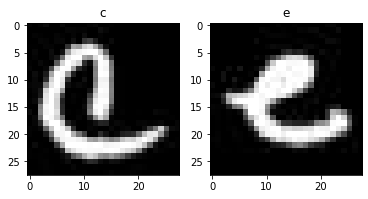

<Figure size 144x144 with 0 Axes>

In [386]:
pic1 = plt.imread('test/c/c_77883.jpg')
pic2 = plt.imread('test/e/e_67552.jpg')
pic1 = np.transpose(pic1, axes=(1, 0, 2))
pic2 = np.transpose(pic2, axes=(1, 0, 2))
fig, axes = plt.subplots(1, 2)
plt.figure(figsize=(2,2))
axes[0].imshow(pic1)
axes[0].set_title('c')
axes[1].imshow(pic2)
axes[1].set_title('e')
plt.show()

In [356]:
classes[0],classes[16]

('a', 'q')

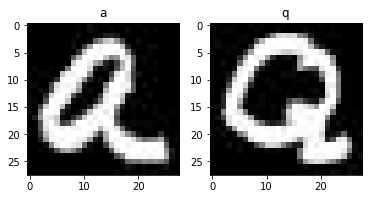

<Figure size 144x144 with 0 Axes>

In [396]:
pic1 = plt.imread('test/a/a_66289.jpg')
pic2 = plt.imread('test/q/q_66318.jpg')
pic1 = np.transpose(pic1, axes=(1, 0, 2))
pic2 = np.transpose(pic2, axes=(1, 0, 2))
fig, axes = plt.subplots(1, 2)
plt.figure(figsize=(2,2))
axes[0].imshow(pic1)
axes[0].set_title('a')
axes[1].imshow(pic2)
axes[1].set_title('q')
plt.show()

In [357]:
classes[3],classes[9]

('d', 'j')

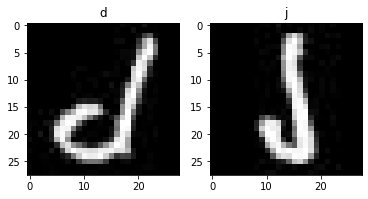

<Figure size 144x144 with 0 Axes>

In [389]:
pic1 = plt.imread('test/d/d_71275.jpg')
pic2 = plt.imread('test/j/j_74796.jpg')
pic1 = np.transpose(pic1, axes=(1, 0, 2))
pic2 = np.transpose(pic2, axes=(1, 0, 2))
fig, axes = plt.subplots(1, 2)
plt.figure(figsize=(2,2))
axes[0].imshow(pic1)
axes[0].set_title('d')
axes[1].imshow(pic2)
axes[1].set_title('j')
plt.show()

In [358]:
classes[8],classes[9]

('i', 'j')

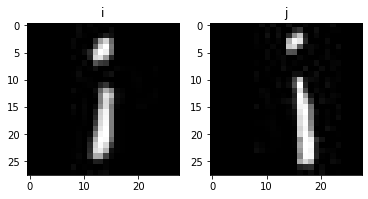

<Figure size 144x144 with 0 Axes>

In [390]:
pic1 = plt.imread('test/i/i_66227.jpg')
pic2 = plt.imread('test/j/j_71559.jpg')
pic1 = np.transpose(pic1, axes=(1, 0, 2))
pic2 = np.transpose(pic2, axes=(1, 0, 2))
fig, axes = plt.subplots(1, 2)
plt.figure(figsize=(2,2))
axes[0].imshow(pic1)
axes[0].set_title('i')
axes[1].imshow(pic2)
axes[1].set_title('j')
plt.show()

In [359]:
classes[10],classes[23]

('k', 'x')

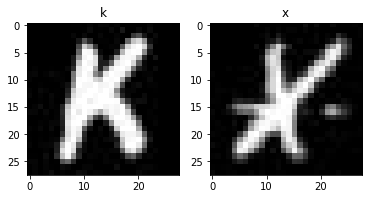

<Figure size 144x144 with 0 Axes>

In [391]:
pic1 = plt.imread('test/k/k_74562.jpg')
pic2 = plt.imread('test/x/x_76608.jpg')
pic1 = np.transpose(pic1, axes=(1, 0, 2))
pic2 = np.transpose(pic2, axes=(1, 0, 2))
fig, axes = plt.subplots(1, 2)
plt.figure(figsize=(2,2))
axes[0].imshow(pic1)
axes[0].set_title('k')
axes[1].imshow(pic2)
axes[1].set_title('x')
plt.show()

In [360]:
classes[6],classes[18]

('g', 's')

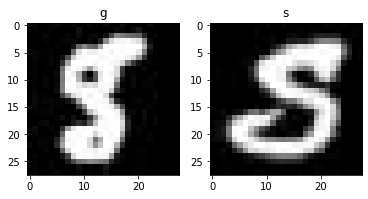

<Figure size 144x144 with 0 Axes>

In [392]:
pic1 = plt.imread('test/g/g_77500.jpg')
pic2 = plt.imread('test/s/s_66731.jpg')
pic1 = np.transpose(pic1, axes=(1, 0, 2))
pic2 = np.transpose(pic2, axes=(1, 0, 2))
fig, axes = plt.subplots(1, 2)
plt.figure(figsize=(2,2))
axes[0].imshow(pic1)
axes[0].set_title('g')
axes[1].imshow(pic2)
axes[1].set_title('s')
plt.show()

Возьмите первую букву вашей фамилии и укажите её точность детекции. С какими буквами ваша модель чаще всего путает эту букву?

Под матрицей выведено процентное соотношение,у буквы Y - 83% точности.

In [401]:
classes[24]

'y'

Чаще всего путается с буквами  под номерами 21, 19 и 9

In [402]:
classes[9],classes[21],classes[19]

('j', 'v', 't')

### Задание 2  
  
*Вес в общей оценке - 0.35*  
  
1. Постройте и обучите модели нейронной сети с 1-м, 2-мя и 3-мя сверточными слоями.  
Попробуйте различные значения параметров сверток и числа фильтров на каждом слое. Оцените качество моделей с различными параметрами, проведите сравнительный анализ.  
2. Для наилучшей конфигурации из предыдущего пункта, сравните, как меняется качество модели при увеличении размера батча при использовании BatchNorm и GroupNorm.    

Начнем с 1 сверточного слоя

1 слой

In [170]:
train_letter_loader = torch.utils.data.DataLoader(letter_data, batch_size=2, shuffle = True)
test_letter_loader = torch.utils.data.DataLoader(letter_data_t, batch_size=2, shuffle = True)

In [167]:
import torch.nn as nn
import torch.nn.functional as F


class Net_3_1(nn.Module):
    def __init__(self):
        super(Net_3_1, self).__init__()# 28*28
        self.conv1 = nn.Conv2d(3, 6, 5) #24*24
        self.pool = nn.MaxPool2d(2, 2) #12*12
        self.fc1 = nn.Linear(12 * 12 * 6, 128)
        self.fc2 = nn.Linear(128, 64)
        self.fc3 = nn.Linear(64,26)

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = x.view(-1, 12 * 12 * 6)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x


net_3_1 = Net_3_1()

In [168]:
import torch.optim as optim
criterion = nn.CrossEntropyLoss()
optimizer = optim.AdamW(net_3_1.parameters(), lr=0.0001)

In [164]:
for epoch in range(5):
    train_loss = []
    train_accuracy = []
    for x_train, y_train in tqdm(train_letter_loader, desc=f"training, epoch {epoch+1}",leave = False):    
        y_pred = net_3_1(x_train)                        
        loss = criterion(y_pred, y_train)        
        loss.backward()                                
        optimizer.step()                               
        optimizer.zero_grad()
        train_loss.append(loss.item())
        train_accuracy.extend((torch.argmax(y_pred, dim=-1) == y_train).numpy().tolist())
    print(f"Epoch: {epoch+1}, train loss: {np.mean(train_loss)}, train acc: {np.mean(train_accuracy)}")
    val_loss = []                                  
    val_accuracy = []
    with torch.no_grad():                         
        for x_val, y_val in tqdm(test_letter_loader, desc=f"validating, epoch {epoch+1}",leave = False):  
            y_pred = net_3_1(x_val)                  
            loss = criterion(y_pred, y_val)  
            val_loss.append(loss.numpy())          
            val_accuracy.extend((torch.argmax(y_pred, dim=-1) == y_val).numpy().tolist())
        
        # печатаем метрики
    print(f"Epoch: {epoch+1}, val loss: {np.mean(val_loss)}, val accuracy: {np.mean(val_accuracy)}")

Epoch: 1, train loss: 0.7178113050422452, train acc: 0.7816307692307692


Epoch: 1, val loss: 0.43875256180763245, val accuracy: 0.8621538461538462


Epoch: 2, train loss: 0.3540827653939412, train acc: 0.8853076923076924


Epoch: 2, val loss: 0.3249088525772095, val accuracy: 0.8933076923076924


Epoch: 3, train loss: 0.28810363424420904, train acc: 0.9050923076923076


Epoch: 3, val loss: 0.3087886869907379, val accuracy: 0.8994615384615384


Epoch: 4, train loss: 0.24983305167426387, train acc: 0.916723076923077


Epoch: 4, val loss: 0.28970572352409363, val accuracy: 0.9073076923076923


Epoch: 5, train loss: 0.22466697176790962, train acc: 0.9233230769230769


Epoch: 5, val loss: 0.27921074628829956, val accuracy: 0.908923076923077


Результаты на acc теперь > 90%

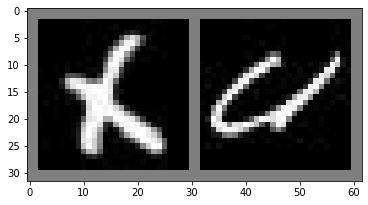

GroundTruth:      x     u


In [171]:
PATH = './3_1fc_net.pth'
torch.save(net_3_1.state_dict(), PATH)
dataiter = iter(test_letter_loader)
images, labels = dataiter.next()

# print images
imshow(torchvision.utils.make_grid(images))
print('GroundTruth: ', ' '.join('%5s' % classes[labels[j]] for j in range(2)))

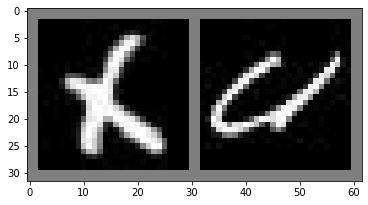

Predicted:      x     u


In [172]:
net_3_1 = Net_3_1()
net_3_1.load_state_dict(torch.load(PATH))
outputs = net_3_1(images)
_, predicted = torch.max(outputs, 1)
imshow(torchvision.utils.make_grid(images))
print('Predicted: ', ' '.join('%5s' % classes[predicted[j]]
                              for j in range(2)))

2 слоя

In [173]:
import torch.nn as nn
import torch.nn.functional as F


class Net_3_2(nn.Module):
    def __init__(self):
        super(Net_3_2, self).__init__()# 28*28
        self.conv1 = nn.Conv2d(3, 6, 5) #24*24
        self.pool = nn.MaxPool2d(2, 2) #12*12
        self.conv2 = nn.Conv2d(6, 16, 5) #8*8
        self.fc1 = nn.Linear(8 * 8 * 16, 128)
        self.fc2 = nn.Linear(128, 64)
        self.fc3 = nn.Linear(64,26)

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = F.relu(self.conv2(x))
        x = x.view(-1, 8 * 8 * 16)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x


net_3_2 = Net_3_2()

In [174]:
import torch.optim as optim
criterion = nn.CrossEntropyLoss()
optimizer = optim.AdamW(net_3_2.parameters(), lr=0.0001)

In [177]:
for epoch in range(5):
    train_loss = []
    train_accuracy = []
    for x_train, y_train in tqdm(train_letter_loader, desc=f"training, epoch {epoch+1}",leave = False):    
        y_pred = net_3_2(x_train)                        
        loss = criterion(y_pred, y_train)        
        loss.backward()                                
        optimizer.step()                               
        optimizer.zero_grad()
        train_loss.append(loss.item())
        train_accuracy.extend((torch.argmax(y_pred, dim=-1) == y_train).numpy().tolist())
    print(f"Epoch: {epoch+1}, train loss: {np.mean(train_loss)}, train acc: {np.mean(train_accuracy)}")
    val_loss = []                                  
    val_accuracy = []
    with torch.no_grad():                         
        for x_val, y_val in tqdm(test_letter_loader, desc=f"validating, epoch {epoch+1}",leave = False):  
            y_pred = net_3_2(x_val)                  
            loss = criterion(y_pred, y_val)  
            val_loss.append(loss.numpy())          
            val_accuracy.extend((torch.argmax(y_pred, dim=-1) == y_val).numpy().tolist())
        
        # печатаем метрики
    print(f"Epoch: {epoch+1}, val loss: {np.mean(val_loss)}, val accuracy: {np.mean(val_accuracy)}")

Epoch: 1, train loss: 0.5586090142047454, train acc: 0.8231538461538461


Epoch: 1, val loss: 0.38164499402046204, val accuracy: 0.8783076923076923


Epoch: 2, train loss: 0.32266250072526137, train acc: 0.8939076923076923


Epoch: 2, val loss: 0.3101273775100708, val accuracy: 0.8966923076923077


Epoch: 3, train loss: 0.2594926898012155, train acc: 0.9132923076923077


Epoch: 3, val loss: 0.26570627093315125, val accuracy: 0.9162307692307692


Epoch: 4, train loss: 0.22368259961230533, train acc: 0.9227538461538461


Epoch: 4, val loss: 0.2543264627456665, val accuracy: 0.9160769230769231


Epoch: 5, train loss: 0.20030032522251087, train acc: 0.9312769230769231


Epoch: 5, val loss: 0.22755923867225647, val accuracy: 0.9273846153846154


С 2 слоями > 92%, что еще лучше

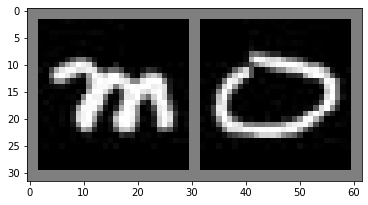

GroundTruth:      m     o


In [178]:
PATH = './3_2fc_net.pth'
torch.save(net_3_2.state_dict(), PATH)
dataiter = iter(test_letter_loader)
images, labels = dataiter.next()

# print images
imshow(torchvision.utils.make_grid(images))
print('GroundTruth: ', ' '.join('%5s' % classes[labels[j]] for j in range(2)))

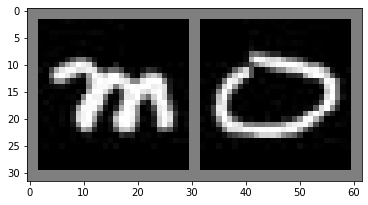

Predicted:      m     o


In [179]:
net_3_2 = Net_3_2()
net_3_2.load_state_dict(torch.load(PATH))
outputs = net_3_2(images)
_, predicted = torch.max(outputs, 1)
imshow(torchvision.utils.make_grid(images))
print('Predicted: ', ' '.join('%5s' % classes[predicted[j]]
                              for j in range(2)))

3 слоя

In [189]:
train_letter_loader = torch.utils.data.DataLoader(letter_data, batch_size=2, shuffle = True)
test_letter_loader = torch.utils.data.DataLoader(letter_data_t, batch_size=2, shuffle = True)

In [190]:
import torch.nn as nn
import torch.nn.functional as F


class Net_3_3(nn.Module):
    def __init__(self):
        super(Net_3_3, self).__init__()# 28*28
        self.conv1 = nn.Conv2d(3, 6, 5) #24*24
        self.pool = nn.MaxPool2d(2, 2) #12*12
        self.conv2 = nn.Conv2d(6, 16, 5) #8*8->4*4
        self.conv3 = nn.Conv2d(16, 32, 2)#3*3
        self.fc1 = nn.Linear(3 * 3 * 32, 128)
        self.fc2 = nn.Linear(128, 64)
        self.fc3 = nn.Linear(64,26)

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = F.relu(self.conv3(x))
        x = x.view(-1, 3 * 3 * 32)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x


net_3_3 = Net_3_3()

In [191]:
import torch.optim as optim
criterion = nn.CrossEntropyLoss()
optimizer = optim.AdamW(net_3_3.parameters(), lr=0.0001)

In [192]:
for epoch in range(5):
    train_loss = []
    train_accuracy = []
    for x_train, y_train in tqdm(train_letter_loader, desc=f"training, epoch {epoch+1}",leave = False):    
        y_pred = net_3_3(x_train)                        
        loss = criterion(y_pred, y_train)        
        loss.backward()                                
        optimizer.step()                               
        optimizer.zero_grad()
        train_loss.append(loss.item())
        train_accuracy.extend((torch.argmax(y_pred, dim=-1) == y_train).numpy().tolist())
    print(f"Epoch: {epoch+1}, train loss: {np.mean(train_loss)}, train acc: {np.mean(train_accuracy)}")
    val_loss = []                                  
    val_accuracy = []
    with torch.no_grad():                         
        for x_val, y_val in tqdm(test_letter_loader, desc=f"validating, epoch {epoch+1}",leave = False):  
            y_pred = net_3_3(x_val)                  
            loss = criterion(y_pred, y_val)  
            val_loss.append(loss.numpy())          
            val_accuracy.extend((torch.argmax(y_pred, dim=-1) == y_val).numpy().tolist())
        
        # печатаем метрики
    print(f"Epoch: {epoch+1}, val loss: {np.mean(val_loss)}, val accuracy: {np.mean(val_accuracy)}")

Epoch: 1, train loss: 0.8804874923671506, train acc: 0.7297846153846154


Epoch: 1, val loss: 0.46969568729400635, val accuracy: 0.8481538461538461


Epoch: 2, train loss: 0.38522710577210384, train acc: 0.8736


Epoch: 2, val loss: 0.33787867426872253, val accuracy: 0.8893846153846154


Epoch: 3, train loss: 0.3071942005518355, train acc: 0.8967538461538461


Epoch: 3, val loss: 0.2924743592739105, val accuracy: 0.9039230769230769


Epoch: 4, train loss: 0.26592824373741614, train acc: 0.9094461538461538


Epoch: 4, val loss: 0.2705860137939453, val accuracy: 0.9087692307692308


Epoch: 5, train loss: 0.24162211184699528, train acc: 0.9174615384615384


Epoch: 5, val loss: 0.26194167137145996, val accuracy: 0.9133846153846154


А вот с 3 сверточными слоями результаты чуть хуже, чем с 2

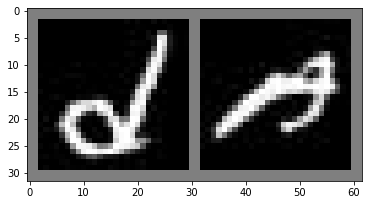

GroundTruth:      d     a


In [193]:
PATH = './3_3fc_net.pth'
torch.save(net_3_3.state_dict(), PATH)
dataiter = iter(test_letter_loader)
images, labels = dataiter.next()

# print images
imshow(torchvision.utils.make_grid(images))
print('GroundTruth: ', ' '.join('%5s' % classes[labels[j]] for j in range(2)))

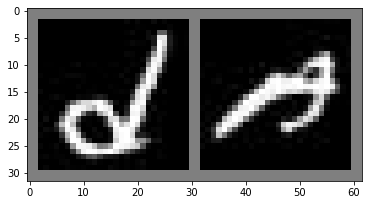

Predicted:      d     a


In [194]:
net_3_3 = Net_3_3()
net_3_3.load_state_dict(torch.load(PATH))
outputs = net_3_3(images)
_, predicted = torch.max(outputs, 1)
imshow(torchvision.utils.make_grid(images))
print('Predicted: ', ' '.join('%5s' % classes[predicted[j]]
                              for j in range(2)))

Попробуем различные функции из задания

In [195]:
import torch.nn as nn
import torch.nn.functional as F


class Net_3_3(nn.Module):
    def __init__(self):
        super(Net_3_3, self).__init__()# 28*28
        self.conv1 = nn.Conv2d(3, 6, 5) #24*24
        self.batch1 = nn.BatchNorm2d(6)
        self.pool = nn.MaxPool2d(2, 2) #12*12
        self.conv2 = nn.Conv2d(6, 16, 5) #8*8->4*4
        self.batch2 = nn.BatchNorm2d(16)
        self.dropout = nn.Dropout(0.1)
        self.conv3 = nn.Conv2d(16, 32, 2)#3*3
        self.fc1 = nn.Linear(3 * 3 * 32, 128)
        self.dropout1 = nn.Dropout(0.2)
        self.fc2 = nn.Linear(128, 64)
        self.fc3 = nn.Linear(64,26)

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.batch1(x)
        x = self.pool(F.relu(self.conv2(x)))
        x = self.batch2(x)
        x = F.relu(self.conv3(x))
        x = x.view(-1, 3 * 3 * 32)
        x = F.relu(self.fc1(x))
        x = self.dropout(x)
        x = F.relu(self.fc2(x))
        x = self.dropout1(x)
        x = self.fc3(x)
        return x


net_3_3 = Net_3_3()

In [196]:
import torch.optim as optim
criterion = nn.CrossEntropyLoss()
optimizer = optim.AdamW(net_3_3.parameters(), lr=0.0001)

In [197]:
for epoch in range(5):
    train_loss = []
    train_accuracy = []
    for x_train, y_train in tqdm(train_letter_loader, desc=f"training, epoch {epoch+1}",leave = False):    
        y_pred = net_3_3(x_train)                        
        loss = criterion(y_pred, y_train)        
        loss.backward()                                
        optimizer.step()                               
        optimizer.zero_grad()
        train_loss.append(loss.item())
        train_accuracy.extend((torch.argmax(y_pred, dim=-1) == y_train).numpy().tolist())
    print(f"Epoch: {epoch+1}, train loss: {np.mean(train_loss)}, train acc: {np.mean(train_accuracy)}")
    val_loss = []                                  
    val_accuracy = []
    with torch.no_grad():                         
        for x_val, y_val in tqdm(test_letter_loader, desc=f"validating, epoch {epoch+1}",leave = False):  
            y_pred = net_3_3(x_val)                  
            loss = criterion(y_pred, y_val)  
            val_loss.append(loss.numpy())          
            val_accuracy.extend((torch.argmax(y_pred, dim=-1) == y_val).numpy().tolist())
        
        # печатаем метрики
    print(f"Epoch: {epoch+1}, val loss: {np.mean(val_loss)}, val accuracy: {np.mean(val_accuracy)}")

Epoch: 1, train loss: 1.0548247911770827, train acc: 0.6786769230769231


Epoch: 1, val loss: 0.5766947865486145, val accuracy: 0.8148461538461539


Epoch: 2, train loss: 0.4931031093221639, train acc: 0.8437538461538462


Epoch: 2, val loss: 0.43201690912246704, val accuracy: 0.8635384615384616


Epoch: 3, train loss: 0.39220701290618915, train acc: 0.8733846153846154


Epoch: 3, val loss: 0.37976518273353577, val accuracy: 0.8754615384615385


Epoch: 4, train loss: 0.3444737433586508, train acc: 0.8889692307692307


Epoch: 4, val loss: 0.3392755389213562, val accuracy: 0.8902307692307693


Epoch: 5, train loss: 0.31309804721449064, train acc: 0.8975384615384615


Epoch: 5, val loss: 0.30347687005996704, val accuracy: 0.9018461538461539


К сожалению, результаты точности предсказания стали хуже на пару процентов

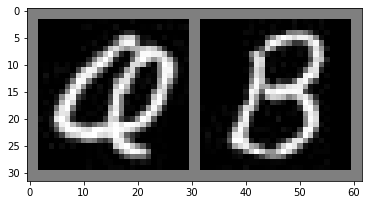

GroundTruth:      q     b


In [198]:
PATH = './3_3fc_net.pth'
torch.save(net_3_3.state_dict(), PATH)
dataiter = iter(test_letter_loader)
images, labels = dataiter.next()

# print images
imshow(torchvision.utils.make_grid(images))
print('GroundTruth: ', ' '.join('%5s' % classes[labels[j]] for j in range(2)))

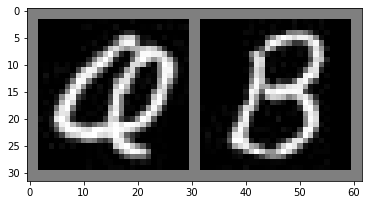

Predicted:      q     b


In [199]:
net_3_3 = Net_3_3()
net_3_3.load_state_dict(torch.load(PATH))
outputs = net_3_3(images)
_, predicted = torch.max(outputs, 1)
imshow(torchvision.utils.make_grid(images))
print('Predicted: ', ' '.join('%5s' % classes[predicted[j]]
                              for j in range(2)))

softplus

In [204]:
class Net_3_3(nn.Module):
    def __init__(self):
        super(Net_3_3, self).__init__()# 28*28
        self.conv1 = nn.Conv2d(3, 6, 5) #24*24
        self.pool = nn.MaxPool2d(2, 2) #12*12
        self.conv2 = nn.Conv2d(6, 16, 5) #8*8->4*4
        self.conv3 = nn.Conv2d(16, 32, 2)#3*3
        self.fc1 = nn.Linear(3 * 3 * 32, 128)
        self.fc2 = nn.Linear(128, 64)
        self.fc3 = nn.Linear(64,26)

    def forward(self, x):
        x = self.pool(F.softplus(self.conv1(x)))
        x = self.pool(F.softplus(self.conv2(x)))
        x = F.relu(self.conv3(x))
        x = x.view(-1, 3 * 3 * 32)
        x = F.softplus(self.fc1(x))
        x = F.softplus(self.fc2(x))
        x = self.fc3(x)
        return x


net_3_3 = Net_3_3()

In [205]:
import torch.optim as optim
criterion = nn.CrossEntropyLoss()
optimizer = optim.AdamW(net_3_3.parameters(), lr=0.0001)

In [206]:
for epoch in range(5):
    train_loss = []
    train_accuracy = []
    for x_train, y_train in tqdm(train_letter_loader, desc=f"training, epoch {epoch+1}",leave = False):    
        y_pred = net_3_3(x_train)                        
        loss = criterion(y_pred, y_train)        
        loss.backward()                                
        optimizer.step()                               
        optimizer.zero_grad()
        train_loss.append(loss.item())
        train_accuracy.extend((torch.argmax(y_pred, dim=-1) == y_train).numpy().tolist())
    print(f"Epoch: {epoch+1}, train loss: {np.mean(train_loss)}, train acc: {np.mean(train_accuracy)}")
    val_loss = []                                  
    val_accuracy = []
    with torch.no_grad():                         
        for x_val, y_val in tqdm(test_letter_loader, desc=f"validating, epoch {epoch+1}",leave = False):  
            y_pred = net_3_3(x_val)                  
            loss = criterion(y_pred, y_val)  
            val_loss.append(loss.numpy())          
            val_accuracy.extend((torch.argmax(y_pred, dim=-1) == y_val).numpy().tolist())
        
        # печатаем метрики
    print(f"Epoch: {epoch+1}, val loss: {np.mean(val_loss)}, val accuracy: {np.mean(val_accuracy)}")

Epoch: 1, train loss: 1.0565183915176715, train acc: 0.6779076923076923


Epoch: 1, val loss: 0.5341468453407288, val accuracy: 0.8278461538461539


Epoch: 2, train loss: 0.4334935160215734, train acc: 0.8600153846153846


Epoch: 2, val loss: 0.36441347002983093, val accuracy: 0.8795384615384615


Epoch: 3, train loss: 0.33123384822502366, train acc: 0.8904


Epoch: 3, val loss: 0.321998655796051, val accuracy: 0.8955384615384615


Epoch: 4, train loss: 0.2852972044868025, train acc: 0.9049538461538461


Epoch: 4, val loss: 0.2770348787307739, val accuracy: 0.909923076923077


Epoch: 5, train loss: 0.25454247924917395, train acc: 0.9139076923076923


Epoch: 5, val loss: 0.27111250162124634, val accuracy: 0.9103076923076923


С 3 слоями softplus работает почти так же, как relu

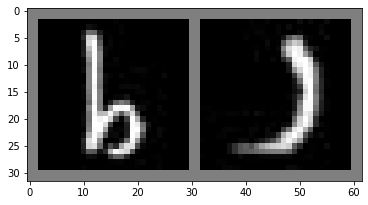

GroundTruth:      b     j


In [207]:
PATH = './3_3fc_net.pth'
torch.save(net_3_3.state_dict(), PATH)
dataiter = iter(test_letter_loader)
images, labels = dataiter.next()

# print images
imshow(torchvision.utils.make_grid(images))
print('GroundTruth: ', ' '.join('%5s' % classes[labels[j]] for j in range(2)))

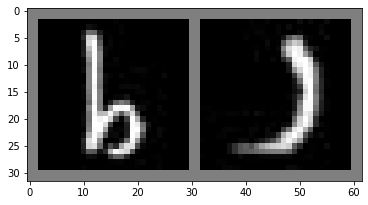

Predicted:      b     j


In [208]:
net_3_3 = Net_3_3()
net_3_3.load_state_dict(torch.load(PATH))
outputs = net_3_3(images)
_, predicted = torch.max(outputs, 1)
imshow(torchvision.utils.make_grid(images))
print('Predicted: ', ' '.join('%5s' % classes[predicted[j]]
                              for j in range(2)))

In [210]:
correct = 0
total = 0
with torch.no_grad():
    for data in test_letter_loader:
        images, labels = data
        outputs = net_3_3(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print('Accuracy of the network on the test images: %d %%' % (
    100 * correct / total))

Accuracy of the network on the test images: 91 %


### Задание 3    
  
Обучите модель с точностью (accuracy) на тестовых данных:  
- `>= 0.85`    +1 балл
- `>= 0.95`    +2 балла
- `>= 0.99`    +3 балла  

Попробуем проверить точность нашей лучшей модели

In [59]:
import torch.nn as nn
import torch.nn.functional as F


class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()# 28*28
        self.conv1 = nn.Conv2d(3, 6, 5) #24*24
        self.pool = nn.MaxPool2d(2, 2) #12*12
        self.conv2 = nn.Conv2d(6, 16, 5) #8*8
        self.fc1 = nn.Linear(8 * 8 * 16, 128)
        self.fc2 = nn.Linear(128, 64)
        self.fc3 = nn.Linear(64,26)

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = F.relu(self.conv2(x))
        x = x.view(-1, 8 * 8 * 16)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x


net = Net()

In [60]:
import torch.optim as optim
criterion = nn.CrossEntropyLoss()
optimizer = optim.AdamW(net.parameters(), lr=0.0001)

In [61]:
for epoch in range(5):
    train_loss = []
    train_accuracy = []
    for x_train, y_train in tqdm(train_letter_loader, desc=f"training, epoch {epoch+1}",leave = False):    
        y_pred = net(x_train)                        
        loss = criterion(y_pred, y_train)        
        loss.backward()                                
        optimizer.step()                               
        optimizer.zero_grad()
        train_loss.append(loss.item())
        train_accuracy.extend((torch.argmax(y_pred, dim=-1) == y_train).numpy().tolist())
    print(f"Epoch: {epoch+1}, train loss: {np.mean(train_loss)}, train acc: {np.mean(train_accuracy)}")
    val_loss = []                                  
    val_accuracy = []
    with torch.no_grad():                         
        for x_val, y_val in tqdm(test_letter_loader, desc=f"validating, epoch {epoch+1}",leave = False):  
            y_pred = net(x_val)                  
            loss = criterion(y_pred, y_val)  
            val_loss.append(loss.numpy())          
            val_accuracy.extend((torch.argmax(y_pred, dim=-1) == y_val).numpy().tolist())
        
        # печатаем метрики
    print(f"Epoch: {epoch+1}, val loss: {np.mean(val_loss)}, val accuracy: {np.mean(val_accuracy)}")

Epoch: 1, train loss: 0.8172822420012206, train acc: 0.7505538461538461


Epoch: 1, val loss: 0.43788063526153564, val accuracy: 0.863


Epoch: 2, train loss: 0.366116893116177, train acc: 0.8809692307692307


Epoch: 2, val loss: 0.3208449184894562, val accuracy: 0.8978461538461538


Epoch: 3, train loss: 0.28985807985656786, train acc: 0.9044769230769231


Epoch: 3, val loss: 0.28816819190979004, val accuracy: 0.9101538461538462


Epoch: 4, train loss: 0.24937181532963162, train acc: 0.916876923076923


Epoch: 4, val loss: 0.2672549784183502, val accuracy: 0.913


Epoch: 5, train loss: 0.22052902378400724, train acc: 0.9250769230769231


Epoch: 5, val loss: 0.25867512822151184, val accuracy: 0.9150769230769231


In [62]:
pred = np.array([])
lab = np.array([])
out = np.empty(26)
imgs = []
with torch.no_grad():
    for data in test_letter_loader:
        images, labels = data
        outputs = net(images)
        _, predicted = torch.max(outputs.data, 1)
        pred = np.append(pred,predicted.data)
        lab = np.append(lab,labels.data)
        for output in outputs:
            out = np.vstack([out,output.numpy()])
        imgs.extend(images.numpy())

pred = torch.tensor(pred).to(torch.int32)
lab = torch.tensor(lab).to(torch.int32)
out = torch.tensor(out)

In [63]:
from torchmetrics import ConfusionMatrix
import seaborn as sns
cm = ConfusionMatrix(num_classes=26)
confmat = cm(pred,lab)

<AxesSubplot:>

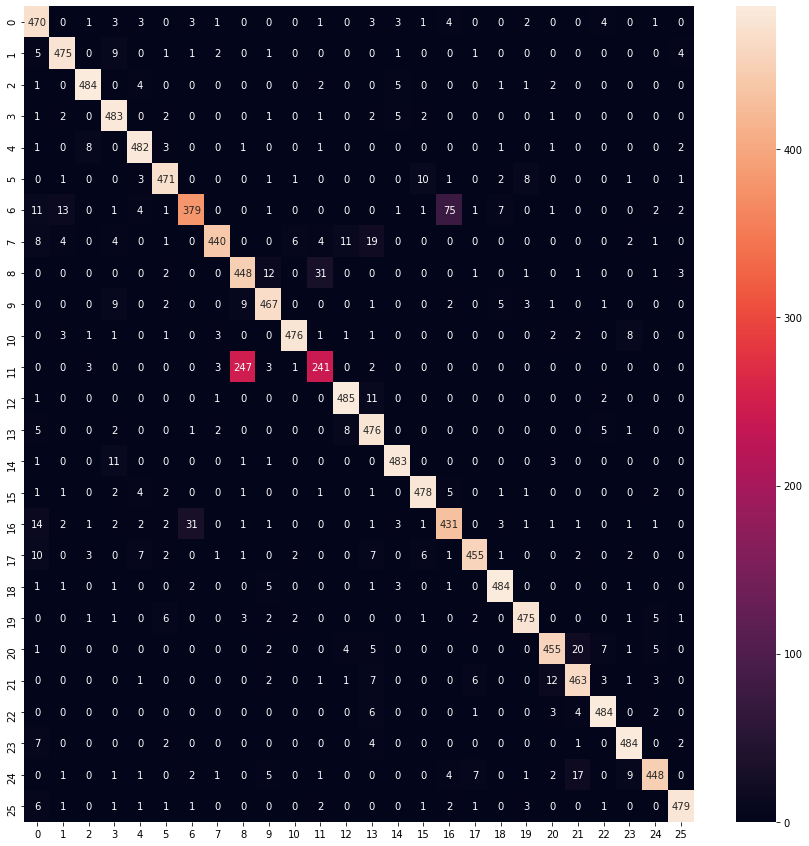

In [64]:
plt.figure(figsize = (15,15))
sns.heatmap(confmat.to(torch.int32), annot=True, fmt ='d')

In [65]:
correct = 0
total = 0
with torch.no_grad():
    for data in test_letter_loader:
        images, labels = data
        outputs = net(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print('Accuracy of the network on the 10000 test images: %d %%' % (
    100 * correct / total))

Accuracy of the network on the 10000 test images: 91 %


Увы для данного датасета, не получилось перейти порог в 91% acc 

С 3 конволюционными слоями работает,почему-то даже хуже, чем с 2

## Бонусные задания

**Задание 1 (1 балл).**  

Напишите на листке белой бумаги (маркером или ручкой) от 5 разных букв (можно больше 5 букв в целом с повторениями, но должно быть минимум 5 разных) английского алфавита (в датасете есть как прописные, так и строчные буквы). Сфотографируйте букву и приведите её картинку к размеру $28\times28$ и, желательно, к чёрно-белой палитре цветов. Передайте получившиеся изображения вашей модели и выполните предсказание, оцените результат.  
  
**Tips:**  
- В датасете все буквы занимают практически всё пространство картинки по высоте или ширине (или вместе). Если ваша буква будет слишком маленькой или большой, это может повлиять на результат детекции.
- Помните, что буква должна быть белого цвета, а фон - чёрного.
- Описание ваших действий при выполнении этого задания (что вы использовали, чтобы привести картинку к нужному виду) категорически приветствуется :)

**Задание 2 (1 балл):**    
  
Используйте transfer learning подход для решения задачи - дообучите какую-либо модель, предобученную на ImageNet, для классификации рукописных букв. Оцените качество решения.  
В качестве предобученой модели можно взять одну из [torchvision models](https://pytorch.org/vision/stable/models.html).

In [24]:
from torchvision import models
from torchvision.models import resnet50
import torch.nn as nn
import torch.nn.functional as F

# Загрузить предобученную сеть -- pretrained=True
net = models.resnet50(pretrained=True)

In [25]:
train_letter_loader = torch.utils.data.DataLoader(letter_data, batch_size=4, shuffle = True)
test_letter_loader = torch.utils.data.DataLoader(letter_data_t, batch_size=4, shuffle = True)

In [26]:
net

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): Bottleneck(
      (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (downsample): Sequential(
        (0): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 

In [27]:
for param in net.parameters():
    param.requires_grad = False

In [28]:
net.fc = nn.Sequential(
    nn.Linear(2048, 1024, bias=True),
    nn.ReLU(),
    nn.Linear(1024, 512, bias=True),
    nn.ReLU(),
    nn.Linear(512, 128, bias=True),
    nn.ReLU(),
    nn.Linear(128, 26, bias=True)
)

In [29]:
for parameter in net.parameters():
    print(parameter.data.shape)

torch.Size([64, 3, 7, 7])
torch.Size([64])
torch.Size([64])
torch.Size([64, 64, 1, 1])
torch.Size([64])
torch.Size([64])
torch.Size([64, 64, 3, 3])
torch.Size([64])
torch.Size([64])
torch.Size([256, 64, 1, 1])
torch.Size([256])
torch.Size([256])
torch.Size([256, 64, 1, 1])
torch.Size([256])
torch.Size([256])
torch.Size([64, 256, 1, 1])
torch.Size([64])
torch.Size([64])
torch.Size([64, 64, 3, 3])
torch.Size([64])
torch.Size([64])
torch.Size([256, 64, 1, 1])
torch.Size([256])
torch.Size([256])
torch.Size([64, 256, 1, 1])
torch.Size([64])
torch.Size([64])
torch.Size([64, 64, 3, 3])
torch.Size([64])
torch.Size([64])
torch.Size([256, 64, 1, 1])
torch.Size([256])
torch.Size([256])
torch.Size([128, 256, 1, 1])
torch.Size([128])
torch.Size([128])
torch.Size([128, 128, 3, 3])
torch.Size([128])
torch.Size([128])
torch.Size([512, 128, 1, 1])
torch.Size([512])
torch.Size([512])
torch.Size([512, 256, 1, 1])
torch.Size([512])
torch.Size([512])
torch.Size([128, 512, 1, 1])
torch.Size([128])
torch.Siz

In [30]:
net.fc

Sequential(
  (0): Linear(in_features=2048, out_features=1024, bias=True)
  (1): ReLU()
  (2): Linear(in_features=1024, out_features=512, bias=True)
  (3): ReLU()
  (4): Linear(in_features=512, out_features=128, bias=True)
  (5): ReLU()
  (6): Linear(in_features=128, out_features=26, bias=True)
)

In [31]:
import torch.optim as optim

criterion = nn.CrossEntropyLoss()
optimizer = optim.AdamW(net.parameters(), lr=0.0001)

In [32]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

In [33]:
for epoch in range(5):
    train_loss = []
    train_accuracy = []
    for x_train, y_train in tqdm(train_letter_loader, desc=f"training, epoch {epoch+1}",leave = False):    
        y_pred = net(x_train)                        
        loss = criterion(y_pred, y_train)        
        loss.backward()                                
        optimizer.step()                               
        optimizer.zero_grad()
        train_loss.append(loss.item())
        train_accuracy.extend((torch.argmax(y_pred, dim=-1) == y_train).numpy().tolist())
    print(f"Epoch: {epoch+1}, train loss: {np.mean(train_loss)}, train acc: {np.mean(train_accuracy)}")
    val_loss = []                                  
    val_accuracy = []
    with torch.no_grad():                         
        for x_val, y_val in tqdm(test_letter_loader, desc=f"validating, epoch {epoch+1}",leave = False):  
            y_pred = net(x_val)                  
            loss = criterion(y_pred, y_val)  
            val_loss.append(loss.numpy())          
            val_accuracy.extend((torch.argmax(y_pred, dim=-1) == y_val).numpy().tolist())
        
        # печатаем метрики
    print(f"Epoch: {epoch+1}, val loss: {np.mean(val_loss)}, val accuracy: {np.mean(val_accuracy)}")

Epoch: 1, train loss: 2.4961113392866574, train acc: 0.25616923076923076


Epoch: 1, val loss: 2.246438503265381, val accuracy: 0.32653846153846156


Epoch: 2, train loss: 2.1661736313471427, train acc: 0.3511076923076923


Epoch: 2, val loss: 2.0913076400756836, val accuracy: 0.36638461538461536


Epoch: 3, train loss: 2.068411812674999, train acc: 0.3803384615384615


Epoch: 3, val loss: 2.0030758380889893, val accuracy: 0.39315384615384613


Epoch: 4, train loss: 1.9989563829444923, train acc: 0.39833846153846153


Epoch: 4, val loss: 1.9756911993026733, val accuracy: 0.4053076923076923


Epoch: 5, train loss: 1.9623985700231332, train acc: 0.40904615384615384


Epoch: 5, val loss: 1.93612802028656, val accuracy: 0.41315384615384615


По результатам acc и loss предобученная модель уступает предыдущим

**Задание 3 (1 балл):**  
  
Добавьте вывод значений функции потерь и accuracy в tensorboard.  
Метрики нужно выводить и для обучающей, и для тестовой выборки.

In [324]:
train_letter_loader = torch.utils.data.DataLoader(letter_data, batch_size=4, shuffle = True)
test_letter_loader = torch.utils.data.DataLoader(letter_data_t, batch_size=4, shuffle = True)

In [325]:
from torch.utils.tensorboard import SummaryWriter

In [326]:
%load_ext tensorboard

The tensorboard extension is already loaded. To reload it, use:
  %reload_ext tensorboard


In [414]:
import torch.nn as nn
import torch.nn.functional as F


class Net_3_3(nn.Module):
    def __init__(self):
        super(Net_3_3, self).__init__()# 28*28
        self.conv1 = nn.Conv2d(3, 6, 5) #24*24
        self.pool = nn.MaxPool2d(2, 2) #12*12
        self.conv2 = nn.Conv2d(6, 16, 5) #8*8->4*4
        self.conv3 = nn.Conv2d(16, 32, 2)#3*3
        self.fc1 = nn.Linear(3 * 3 * 32, 128)
        self.fc2 = nn.Linear(128, 64)
        self.fc3 = nn.Linear(64,26)

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = F.relu(self.conv3(x))
        x = x.view(-1, 3 * 3 * 32)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x


net_3_3 = Net_3_3()

In [415]:
import torch.optim as optim

criterion = nn.CrossEntropyLoss()
optimizer = optim.AdamW(net_3_3.parameters(), lr=0.0001)

In [416]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

In [417]:
writer = SummaryWriter('./boards5/exp2')

In [418]:
it1 = 1
it2 = 1
for epoch in range(5):
    train_loss = []                                  
    train_accuracy = []
    N = len(train_letter_loader)
    for x_train, y_train in tqdm(train_letter_loader, desc=f"training, epoch {epoch+1}",leave = False):    
        it1 = it1+1
        y_pred = net_3_3(x_train)                        
        loss = criterion(y_pred, y_train)
        loss.backward()                                
        optimizer.step()
        optimizer.zero_grad()
        train_loss.append(loss.item())        
        train_accuracy.extend((torch.argmax(y_pred, dim=-1) == y_train).numpy().tolist())
    writer.add_scalar('training loss',
                            np.mean(train_loss),
                            epoch * len(train_letter_loader) + it1)
    writer.add_scalar('training acc',
                            np.mean(train_accuracy),
                            epoch * len(train_letter_loader) + it1)
    print(f"Epoch: {epoch+1}, loss train: {np.mean(train_loss)}, acc train: {np.mean(train_accuracy)}")
    val_loss = []                                  
    val_accuracy = []
    with torch.no_grad():                         
        for x_val, y_val in tqdm(test_letter_loader, desc=f"validating, epoch {epoch+1}",leave = False):  
            it2 = it2+1
            y_pred = net_3_3(x_val)                  
            loss = criterion(y_pred, y_val)  
            val_loss.append(loss.numpy())          
            val_accuracy.extend((torch.argmax(y_pred, dim=-1) == y_val).numpy().tolist())
    writer.add_scalar('valid loss',
                            np.mean(val_loss),
                            epoch * len(test_letter_loader) + it2)
    writer.add_scalar('valid acc',
                            np.mean(val_accuracy),
                            epoch * len(test_letter_loader) + it2)
        # печатаем метрики
    print(f"Epoch: {epoch+1}, loss val: {np.mean(val_loss)}, acc val: {np.mean(val_accuracy)}")

Epoch: 1, loss train: 0.9442207864658477, acc train: 0.712276923076923


Epoch: 1, loss val: 0.5178911685943604, acc val: 0.8351538461538461


Epoch: 2, loss train: 0.4375646853406412, acc train: 0.8592461538461539


Epoch: 2, loss val: 0.4034919738769531, acc val: 0.8749230769230769


Epoch: 3, loss train: 0.3434588538010533, acc train: 0.8870461538461538


Epoch: 3, loss val: 0.3482385575771332, acc val: 0.8883076923076924


Epoch: 4, loss train: 0.2954235323748623, acc train: 0.9023692307692308


Epoch: 4, loss val: 0.30114874243736267, acc val: 0.9000769230769231


Epoch: 5, loss train: 0.2652514472161456, acc train: 0.9112


Epoch: 5, loss val: 0.2778990864753723, acc val: 0.908923076923077


In [419]:
writer.add_graph(net_3_3, x_val)

In [420]:
%tensorboard --logdir boards5

In [421]:
writer.close()